# Init Tdx 

In [1]:
# import logging
import sys

# stdout=sys.stdout
sys.path.append('../../')
import os
import random
import time

import matplotlib
import matplotlib.pyplot as plt
import mplfinance as mpf
# sys.stdout=stdout
import numpy as np
# import numpy as np
import pandas as pd
from JohnsonUtil import commonTips as cct
from JSONData import sina_data
from JSONData import tdx_data_Day as tdd
from mplfinance.original_flavor import candlestick_ohlc

# from JSONData import tdx_hdf5_api as h5a

%matplotlib widget
plt.rc('font', family='SimHei', size=13)
matplotlib.get_backend()
# jupyter nbextension enable --py widgetsnbextension

os.environ['NUMEXPR_MAX_THREADS'] = '12'
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"
import nest_asyncio

nest_asyncio.apply()

In [2]:
block_path = tdd.get_tdx_dir_blocknew() + '060.blk'

## 功能定义DEF

### ra_diff


In [3]:
def ra_diff(df):
    df['ra_diff'] = df.close.apply(lambda x: round(x / df.close.min(), 2))
    return df

### bullish 测算

In [4]:
import numpy as np


def calculate_slope(data):
    # Calculate the slope of the line that connects two points
    slope = round((data[1] - data[0]) / (1), 2)
    return slope


def detect_bull_bear(price_data, window=10):
    # Calculate the slopes of the price data for the last `window` days
    slopes = []
    for i in range(len(price_data) - window, len(price_data) - 1):
        slope = calculate_slope([price_data[i], price_data[i + 1]])
        # print(slope)
        slopes.append(slope)

    # Compare the current slope with the average slope of the last `window` days
    avg_slope = round(np.mean(slopes), 2)
    curr_slope = calculate_slope([price_data[-window], price_data[-1]])
    print(len(slopes), avg_slope, curr_slope)

    if curr_slope > avg_slope:
        # return "Bullish"
        return "Bull"
    else:
        return "Bear"


def detect_bull_bear_apply(price_data, window=10):
    # Calculate the slopes of the price data for the last `window` days
    slopes = []
    # try:
    if len(price_data) > 20:
        for i in range(len(price_data) - window, len(price_data) - 1):
            slope = calculate_slope([price_data[i], price_data[i + 1]])
            # print(slope)
            slopes.append(slope)

        # Compare the current slope with the average slope of the last `window` days
        avg_slope = round(np.mean(slopes), 2)
        curr_slope = calculate_slope([price_data[-window], price_data[-1]])
        # print(len(slopes), avg_slope, curr_slope)

        # if curr_slope > avg_slope:
        #     # return "Bullish"
        #     return "Bull"
        # else:
        #     return "Bear"
        return curr_slope
    else:
        return round((price_data[-1] - price_data[0]) / (1), 2)


code = '601360'
# Example usage
# price_data = [100, 95, 97, 99, 102, 105, 108, 111,1]
dfc = tdd.get_tdx_Exp_day_to_df(
    code, dl=60, resample='d').sort_index(
    ascending=True).reset_index()
# dfc = get_sina_data_cname(dfc)
price_data = dfc.close.values.tolist()
price_data[1], dfc.date[0]
price_data[-1], dfc.date[-1:]
print(detect_bull_bear(price_data))
print(detect_bull_bear_apply(price_data))

# Output: "Bullish"

(7.19, '2024-08-15')

(10.69,
 52    2024-11-06
 Name: date, dtype: object)

9 0.25 2.22
Bull
2.22


### regression_line(X, Y)
regression_ratio(df, window=10):

6.33 0.06
Above
0.06


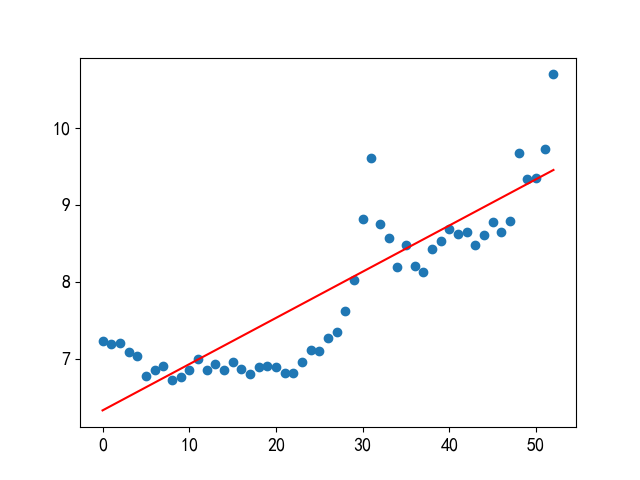

In [5]:


def regression_line(X, Y, limit=10,showall=False):
    # Calculate the coefficients of the regression line
    if not showall:
        X = X[-limit:]
        Y = Y[-limit:]
    n = len(X)
    sum_x = np.sum(X)
    sum_y = np.sum(Y)
    sum_xy = np.sum(X * Y)
    sum_xx = np.sum(X * X)
    a = round((sum_y * sum_xx - sum_x * sum_xy) / (n * sum_xx - sum_x * sum_x), 2)
    b = round((n * sum_xy - sum_x * sum_y) / (n * sum_xx - sum_x * sum_x), 2)
    return a, b


def regression_ratio(df, window=10):
    # Calculate the coefficients of the regression line
    if isinstance(df, pd.Series):
        # Y = df.values[-window:]
        # X = df.reset_index().index[-window:]
        Y = df.values
        X = df.reset_index().index
    else:
        if 'close' in df.columns:
            df = df.reset_index()
            # X = df.index[-limit:]
            # Y = df.close[-limit:]
            X = df.index
            Y = df.close
        else:
            # Y = df.values[-limit:]
            # X = df.reset_index().index[-limit:]
            Y = df.values
            X = df.reset_index().index
            
    n = len(X)
    sum_x = np.sum(X)
    sum_y = np.sum(Y)
    sum_xy = np.sum(X * Y)
    sum_xx = np.sum(X * X)
    # a = round((sum_y * sum_xx - sum_x * sum_xy) / (n * sum_xx - sum_x * sum_x),2)
    b = round((n * sum_xy - sum_x * sum_y) / (n * sum_xx - sum_x * sum_x), 2)
    return b


def predict_price(time, a, b):
    # Predict the price using the regression line
    price = a + b * time
    return price


def plot_regression_line(X, Y, a, b):
    # Plot the regression line
    # plt.close()
    plt.scatter(X, Y)
    plt.plot(X, a + b * X, color="red")
    plt.show()


def detect_position(price, a, b, X):
    # Detect the position of the current price on the regression line
    regression_price = predict_price(X[-1], a, b)
    if price > regression_price:
        return "Above"
    elif price < regression_price:
        return "Below"
    else:
        return "On"


# Example usage
time_index = dfc.index
price = dfc.close.values
a, b = regression_line(time_index, price,showall=True)
print(a, b)
# Output: (100.0, 5.0)
print(detect_position(132, a, b, time_index))
print(regression_ratio(dfc))
plot_regression_line(time_index, price, a, b)

# print(detect_position(132, a, b, time))
# Output: "On"

6.33 0.06
Above
0.06


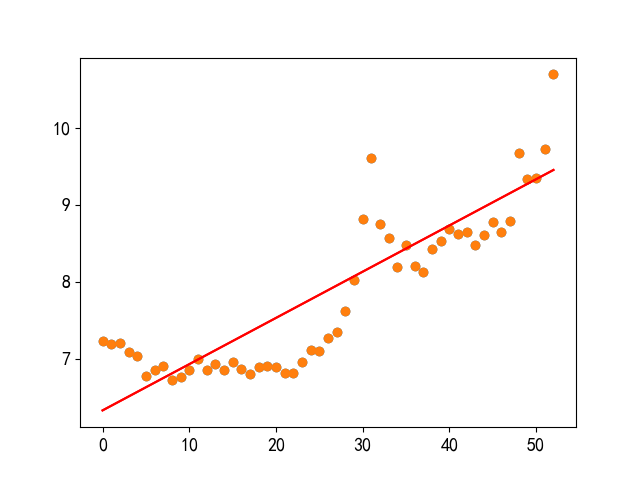

In [6]:


def regression_line(X, Y, limit=10,showall=False):
    # Calculate the coefficients of the regression line
    if not showall:
        X = X[-limit:]
        Y = Y[-limit:]
    n = len(X)
    sum_x = np.sum(X)
    sum_y = np.sum(Y)
    sum_xy = np.sum(X * Y)
    sum_xx = np.sum(X * X)
    a = round((sum_y * sum_xx - sum_x * sum_xy) / (n * sum_xx - sum_x * sum_x), 2)
    b = round((n * sum_xy - sum_x * sum_y) / (n * sum_xx - sum_x * sum_x), 2)
    return a, b


def regression_ratio(df, window=10):
    # Calculate the coefficients of the regression line
    if isinstance(df, pd.Series):
        # Y = df.values[-window:]
        # X = df.reset_index().index[-window:]
        Y = df.values
        X = df.reset_index().index
    else:
        if 'close' in df.columns:
            df = df.reset_index()
            # X = df.index[-limit:]
            # Y = df.close[-limit:]
            X = df.index
            Y = df.close
        else:
            # Y = df.values[-limit:]
            # X = df.reset_index().index[-limit:]
            Y = df.values
            X = df.reset_index().index
            
    n = len(X)
    sum_x = np.sum(X)
    sum_y = np.sum(Y)
    sum_xy = np.sum(X * Y)
    sum_xx = np.sum(X * X)
    # a = round((sum_y * sum_xx - sum_x * sum_xy) / (n * sum_xx - sum_x * sum_x),2)
    b = round((n * sum_xy - sum_x * sum_y) / (n * sum_xx - sum_x * sum_x), 2)
    return b


def predict_price(time, a, b):
    # Predict the price using the regression line
    price = a + b * time
    return price


def plot_regression_line(X, Y, a, b):
    # Plot the regression line
    # plt.close()
    plt.scatter(X, Y)
    plt.plot(X, a + b * X, color="red")
    plt.show()


def detect_position(price, a, b, X):
    # Detect the position of the current price on the regression line
    regression_price = predict_price(X[-1], a, b)
    if price > regression_price:
        return "Above"
    elif price < regression_price:
        return "Below"
    else:
        return "On"


# Example usage
time_index = dfc.index
price = dfc.close.values
a, b = regression_line(time_index, price,showall=True)
print(a, b)
# Output: (100.0, 5.0)
print(detect_position(132, a, b, time_index))
print(regression_ratio(dfc))
plot_regression_line(time_index, price, a, b)

# print(detect_position(132, a, b, time))
# Output: "On"

In [7]:
dfc.columns

Index(['date', 'code', 'open', 'high', 'low', 'close', 'vol', 'amount', 'ma5d',
       'ma10d',
       ...
       'hmax', 'hmax60', 'high4', 'low4', 'lastdu4', 'macdwhite', 'macdyellow',
       'macdlast1', 'macdlast2', 'macdlast3'],
      dtype='object', length=190)

### check_postion_vol_price

In [8]:
from sklearn.linear_model import LinearRegression


def check_postion_vol_price(df):
    # 加载数据
    # df = pd.read_csv("data.csv")

    # 创建输入数据
    X = df[["close", "vol"]].values
    y = df["close"].values

    # 训练回归模型
    reg = LinearRegression().fit(X, y)

    # 计算斜率和截距
    slope = reg.coef_[0]
    intercept = reg.intercept_

    # 计算上轨和下轨
    upper_band = slope * df["close"] + intercept + 2 * df["vol"]
    lower_band = slope * df["close"] + intercept - 2 * df["vol"]

    # 判断价格是否在通道内
    df["Positon"] = np.where(
        df["close"] > upper_band, "Long", np.where(
            df["close"] < lower_band, "Short", "Neutral"))
    return df


dfc = check_postion_vol_price(dfc)
dfc[-1:]

date    code  open   high   low  close          vol        amount  \
52  2024-11-06  601360   9.7  10.69  9.55  10.69  540058999.0  5.653091e+09   

    ma5d  ma10d  ...  hmax60  high4  low4   lastdu4  macdwhite  macdyellow  \
52  9.75   9.21  ...   10.69   7.28  7.03  1.021038       0.55        0.42   

    macdlast1  macdlast2  macdlast3  Positon  
52       0.26       0.13       0.09  Neutral  

[1 rows x 191 columns]

In [9]:

# dfc=  dfc.rename(columns={'date': 'Date', "open":"Open","high":"High","low": "Low","close":"Close"})
dfc.columns
# dfc[["Date", "Open", "High", "Low", "Close"]][-2:]
dfc.date[:3]
dfc.date = pd.to_datetime(dfc.date)
# dfc.set_index('date')
dfc.date[-1:]

Index(['date', 'code', 'open', 'high', 'low', 'close', 'vol', 'amount', 'ma5d',
       'ma10d',
       ...
       'hmax60', 'high4', 'low4', 'lastdu4', 'macdwhite', 'macdyellow',
       'macdlast1', 'macdlast2', 'macdlast3', 'Positon'],
      dtype='object', length=191)

0    2024-08-15
1    2024-08-16
2    2024-08-19
Name: date, dtype: object

52   2024-11-06
Name: date, dtype: datetime64[ns]

### show_ohlc_upper 

xratio:0.06 
code: 601360


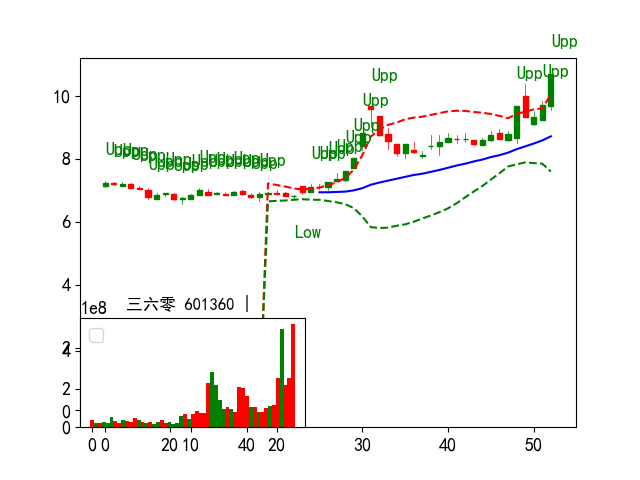

In [10]:

def show_ohlc_upper(df, code=None, allshow=True):
    # 加载数据
    # df = pd.read_csv("data.csv")
    # plt.close()
    # 计算OHLC数据
    # df = df.rename(columns={'date': 'Date', "open": "Open",
    #                "high": "High", "low": "Low", "close": "Close"})
    # df.Date = df.Date.apply(lambda x:str(x).replace('-',''))
    if 'name' not in df.columns and code is not None:
        df['name']= tdd.get_sina_data_code(code)
    if allshow:
        if 'ra_diff' in df.columns:
            print("xratio:%s ra_diff:%s" % (regression_ratio(df),df.ra_diff[-1]))
        else:
            print("xratio:%s " % (regression_ratio(df)))
    # df=df[df.upper > 0]
    df = df.rename(columns={'vol': 'volume'})
    df = df.reset_index()
    # df.date = pd.to_datetime(df.index)
    df.date = df.index
    # print(df.Date)
    # ohlc = df[["Date", "Open", "High", "Low", "Close"]].values
    ohlc = df[["date", "open", "high", "low", "close", 'volume']].values

    # 计算上轨和下轨
    # upper_band = df[df.upper != 0].upper
    # lower_band = df[df.lower != 0].lower
    upper_band = df.upper
    lower_band = df.lower
    
    # print(lower_band,df.lower)
    # print(upper_band,df.upper)

    if 'ma20d' in df.columns:
        ma20d = df[df.ma20d > 0].ma20d
    elif 'ma20' in df.columns:
        ma20d = df[df.ma20 > 0].ma20
    else:
        print('not ma20 ma20d')
    idx = len(df) - len(upper_band)
    idx2 = len(df) - len(lower_band)
    if idx != idx2:
        print(idx, len(df), len(upper_band))
        print(idx2, len(lower_band))

    # 计算当前价格的位置
    position = ['' for i in range(len(df))]
    # print(idx,len(df) ,len(upper_band),position)
    
        # else:
            # position[i] = 'Middle Band'
    # print(position)
    # 绘制OHLC图
    fig, ax = plt.subplots()
    candlestick_ohlc(ax, ohlc, width=0.6, colorup='g', colordown='r')

    # 添加上轨和下轨
    
    for i in range(idx, len(upper_band), 1):
        # print(df["close"][i])
        # print(upper_band[i],df["low"][i])
        # print(i,lower_band[i])
        #error upper_band ==0.0
        if df["close"][i] > upper_band[i]:
            position[i] = 'Upp'
        elif df["low"][i] < lower_band[i]:
            position[i] = 'Low'
            
    plt.plot(upper_band.index, upper_band, 'r--', label='Upper Band')
    plt.plot(lower_band.index, lower_band, 'g--', label='Lower Band')
    
    plt.plot(ma20d.index, ma20d, 'b', label='ma20')

    if 'hat' in df.columns:
        plt.plot(df.hat.index, df.hat, 'g', label='hat')
    # 添加位置
    for i, txt in enumerate(position):
        if txt == 'Low':
            plt.annotate(txt, (df["date"][i], df["close"][i]), xytext=(
                0, -30), textcoords='offset points', color='g')
        else:
            plt.annotate(txt, (df["date"][i], df["close"][i]), xytext=(
                0, 20), textcoords='offset points', color='g')
    axx = fig.add_subplot(325)
    # axx.plot(df[["volume"]])
    # from matplotlib import transforms
    # pad = 0.25
    # yl = ax.get_ylim()
    # ax.set_ylim(yl[0]-(yl[1]-yl[0])*pad,yl[1])
    # axx = ax.twinx()
    # axx.set_position(transforms.Bbox([[0.125,0.1],[0.9,0.32]]))

    volume = np.asarray(df.volume)
    pos = df['open'] - df['close'] < 0
    neg = df['open'] - df['close'] >= 0
    idx = np.asarray([x for x in range(len(df.date))])
    # print len(dates),len(df),ax.get_xlim(),ax.get_xticks()
    axx.bar(idx[pos], volume[pos], color='red', width=1, align='center')
    axx.bar(idx[neg], volume[neg], color='green', width=1, align='center')

    # position = ['' for i in range(len(df))]
    # position = df.Positon
    # for i, txt in enumerate(position):
    #     plt.annotate(txt, (df["Date"][i], df["Close"][i]), xytext=(0,20), textcoords='offset points')
    # 添加图例
    plt.legend(loc='best')
    # plt.legend(["Now:%s" % df.close[-1], "Hi:%s" % df.high[-1], "Lo:%0.2f" % (asset.iat[-1]), "day:%s" %
    #             len(asset), "fib:%s" % (fib),"MA:%s"%(roll_mean_days)], fontsize=12, loc=0)
    if 'name' in df.columns:
        if 'code' in df.columns:
            plt.title(df.name.values[-1:][0] + " " + df.code[0] + " | ", fontsize=12)
        else:
            plt.title(str(df.name.values[-1:][0]) + " " + " | ", fontsize=12)

    else:
        if 'code' in df.columns:
            plt.title(" | " + df.code[0] + " | ", fontsize=12)
        else:
            if code is None:
                plt.title(" | " + " | ", fontsize=12)
            else:
                plt.title(" | " + code + " | ", fontsize=12)

    # 显示图形
    print("code:",code)
    plt.show()


show_ohlc_upper(dfc,code=dfc.code[0])

In [11]:
'code' in dfc.columns

True

### show_channel_mpl

In [12]:
dfc['position'] = 0


def show_channel_mpl_bug(df, limit=60):
    # Compute the channel
    def compute_channel(df):
        # Compute the high and low of the past n periods
        n = 20
        high = df['high'].rolling(window=n, min_periods=n).max()
        low = df['low'].rolling(window=n, min_periods=n).min()
        df['upper_channel'] = high + (high - low) * 0.5
        df['lower_channel'] = low - (high - low) * 0.5

        # Update the position based on the current price
        df['position'] = np.where(df['close'] > df['upper_channel'] * 0.66, 1,
                                  np.where(df['close'] < df['lower_channel'], -1, 0))
        # print(df['position'])

    df = df.rename(columns={'vol': 'volume'})
    # df = df.reset_index()
    if 'date' in df.columns:
        df.date = pd.to_datetime(df.date)
    else:
        df = df.reset_index()
        df.date = pd.to_datetime(df.date)
    df = df.set_index('date')
    # df.date = df.index
    df = df.loc[:, ["open", "high", "low", "close", 'volume']]
    compute_channel(df)

    # fig, ax = plt.subplots()
    # Plot the ohlc chart
    mpf.plot(df, type='candle', title='OHLC chart with channel and position',
             ylabel='Price', volume=True, mav=(10, 20),
             show_nontrading=False, ylabel_lower='Position')
    # returnfig=True)

    # for i, txt in enumerate(df.position):
    #     # print(i,txt,df.index[i], df["close"][i])
    #     if txt == 0:
    #         plt.annotate("Down", (df.index[i], df["close"][i]), xytext=(
    #             0, -30), textcoords='offset points', color='g')
    #     else:
    #         plt.annotate("UP", (df.index[i], df["close"][i]), xytext=(
    #             0, 20), textcoords='offset points', color='g')

    # axlist[0].set_yticks([-1, 0, 1])
    # axlist[2].xaxis.set_ticks(df['position'])
    # axlist[2].set_xticklabels(df['upper_channel'])
    # yticks=[-1, 0, 1], yticklabels=['Sell', 'Hold', 'Buy'],
    # overlays=[(df['upper_channel'], None), (df['lower_channel'], None)])
# show_channel_mpl(dfc)

## TDX def

In [13]:
global sina_dm
sina_dm = None


def get_sina_data_cname(df, dm=None, index=False, realtime=False):
    # index_status=False
    global sina_dm
    if dm is None:
        if sina_dm is None:
            dm = sina_data.Sina().market('all')
        else:
            dm = sina_dm.copy()

    if 'ticktime' in df.columns:
        time_l = time.mktime(dm.loc[:, 'ticktime'][-1].timetuple())
        dur = round((time.time() - time_l) / 60, 2)
        if dur > 5:
            print("timel > 5,renew dm")
            dm = sina_data.Sina().market('all')
            sina_dm = dm.copy()

    if realtime:
        print("compute percent")
        df.rename(columns={'low': 'llow',
                  'high': 'lhigh', 'open': 'lopen'}, inplace=True)
        if 'nclose' in dm.columns:
            dd = cct.combine_dataFrame(
                df, dm.loc
                [:,
                 ['nclose', 'close', 'name', 'open', 'high', 'low', 'llastp',
                  'ticktime']],
                clean=True)
        else:
            dd = cct.combine_dataFrame(
                df, dm.loc
                [:, ['close', 'name', 'open', 'high', 'low', 'llastp', 'ticktime']],
                clean=True)
        dd['perc'] = ((dd['close'] - dd['llastp']) / dd['llastp'] *
                      100).map(lambda x: round(x, 2))
        # dd = cct.combine_dataFrame(df, dm['name'])

    else:
        dd = cct.combine_dataFrame(df, dm['name'])
    # cname = sina_data.Sina().get_code_cname(code)
    return dd


def write_code_to_blk(codew, blk='060'):
    block_path = tdd.get_tdx_dir_blocknew() + '%s.blk' % (blk)
    write_blk = 'n'
    write_blk = cct.cct_raw_input("write blk [Y] or [N]:")
    if write_blk == 'y' or write_blk == 'Y':
        hdf5_wri = cct.cct_raw_input(
            "Rewrite code [Y] or append [N](defalut:N):")
        if hdf5_wri == 'y' or hdf5_wri == 'Y':
            append_status = False
        else:
            append_status = True
        if len(codew) > 3:
            cct.write_to_blocknew(block_path, codew, append_status,
                                  doubleFile=False, keep_last=0)
            ("write:%s block_path:%s" % (len(codew), block_path))
        else:
            ("write error:%s block_path:%s" % (len(codew), block_path))
    return True

def get_multiIndex_drop_last_row(df,dropline=1):

    return df.drop(level='date', labels=df.index.get_level_values('date')[-dropline])

def clean_688(df):
    df = df[(~df.index.str.contains("688"))]
    return df

def clean_sina_dm(dd):
    if (cct.get_now_time_int() > 915 and cct.get_now_time_int() < 926):
        dd = dd[dd.close > 0]
    else:
        dd = dd[dd.open > 0]
    return dd

def compute_perd_value(df, market_value=3, col="vol", col_new='volsum'):

    # if market_value == None or market_value < "2":
    #     market_value = 3
    # if market_value > 1 and len(df[ df["%s%sd" % (col, market_value)] > 2])   :
    market_value = str(market_value)
    if market_value > str(1):
        temp = df[
            df.columns[
                (df.columns >= "%s1d" % (col)) &
                (df.columns <= "%s%sd" % (col, market_value))
            ]
        ]

        df['%s%sd' % (col_new, market_value)] = temp.T.sum().apply(
            lambda x: round(x, 1))
    else:
        print("market_value <= 1,No Compute")

    return df


def show_tdx_data(df, codelist=None, market_value='3', col=None):
    col_src = [
        "name", "couts", "date", "perc", "ra_diff","xratio", "idx", "hat", "close",
        "volsum5d", "hmax", "lmin", "perc1d", "ma20", "ma250", "nclose",
        "llow", 'vol1d', 'vol2d', 'vol3d', 'vol4d', 'vol5d', "perc%sd" %
        (market_value),
        "perc5d"]

    if isinstance(df, pd.Series):
        col_name = [co for co in col_src if co in df.index]
        # col_name.insert(1,'date')
    else:
        col_name = [co for co in col_src if co in df.columns]

    # print(col_name)
    # if isinstance(df, pd.DataFrame) and 'name' in df.columns:
    #     columns_ = col_name
    # else:
    #     if isinstance(df, pd.Series) and 'name' in df.index:
    #         columns_ = col_name.insert(1, "date")
    #     else:
    #         columns_ = col_name.remove("name")
    
    if isinstance(col,list):
        col_name.extend(col)
    elif col is not None:
        col_name.insert(4, col)

    if codelist is None:
        if isinstance(df, pd.Series):
            print("Count:1")
            temp = df.loc[col_name]
        else:
            print("Count:%s %s" % (df.shape))
            temp = df.loc[:, col_name]
    else:
        temp = df.loc[[x for x in codelist if x in df.index], col_name]
    return temp


def get_multi_date_duration(df, dt):
    dd = df.reset_index()
    dd = dd[dd.date >= dt]
    # dd['couts'] = dd.groupby(['code'])['code'].transform('count')
    dd = dd.set_index(['code', 'date'])
    return dd


def get_multi_code_count(df, col='code'):
    dd = df.reset_index()
    dd['couts'] = dd.groupby([col])[col].transform('count')
    dd = dd.sort_values(by=['couts', 'date'], ascending=[0, 1])
    print('count dd.couts')
    dd = dd.set_index(['code', 'date'])
    return dd


def multindex_iloc(df, index):
    label = df.index.levels[0][index]
    return df.iloc[df.index.get_loc(label)]


def get_groupby_mean_median_close(dfs):

    groupd = dfs.groupby(level=[0])

    df = groupd['close'].agg(['median', 'mean'])
    df['close'] = groupd.tail(1).reset_index().set_index(['code'])['close']
    # dfs['mean'] = groupd['close'].agg('mean')
    # dfs['median'] = groupd['close'].agg('median')

    # dfs = dfs.fillna(0)
    # idx = pd.IndexSlice
    # mask = ( (dfs['mean'] > dfs['median'])
    #         & (dfs['close'] > dfs['mean'])
    #         )
    # df=dfs.loc[idx[mask, :]]

    df = df[(df['mean'] > df['median']) & (df['close'] > df['mean'])]

    # dt_low = None
    # if dl == 1:
    #     dfs = groupd.tail(1)
    #     print("dfs tail1")
    # else:
    #     dl = 30
    #     dindex = tdd.get_tdx_Exp_day_to_df(
    #         '999999', dl=dl).sort_index(ascending=False)
    #     dt = tdd.get_duration_price_date('999999', df=dindex)
    #     dt = dindex[dindex.index >= dt].index.values
    #     dt_low = dt[-1]
    #     dtlen = len(dt) if len(dt) >0 else 1
    #     dfs = groupd.tail(dtlen)
    #     print("dfs tail:%s dt:%s"%(dtlen,dt))
    #     dfs = get_multi_date_duration(dfs,dt[-1])
    return df


def compute_df_Col_lastday(dfs, col='close', colre='perc', days=3, plus=True):
    for da in range(int(days)):
        da += 1
        if plus:
            dfs['%s%sd' % (colre, da)] = round(
                (dfs[col] - dfs[col].shift(da)) / dfs[col].shift(da) * 100, 2)
        else:
            if da == 1:
                dfs['%s%sd' % (colre, da)] = round(
                    (dfs[col] - dfs[col].shift(da)) / dfs[col].shift(da) * 100, 2)
            else:
                dfs['%s%sd' % (colre, da)] = round(
                    (dfs[col].shift(da - 1) - dfs[col].shift(da)) / dfs[col].shift(da) * 100, 2)
    return dfs

In [14]:
def get_roll_mean_all(
        single=True, tdx=False, app=True, duration=100, ma_250_l=1.02,
        ma_250_h=1.11, resample='d'):
    time_s = time.time()
    if not app and cct.get_file_size(block_path) > 100 and cct.creation_date_duration(block_path) == 0:
        print("It's Today Update")
        return True
    code_list = sina_data.Sina().market('all').index.tolist()
    code_list.extend(['999999', '399001', '399006'])
    print("all code:", len(code_list))
    if duration < 300:
        h5_fname = 'tdx_all_df' + '_' + str(300)
        h5_table = 'all' + '_' + str(300)
    else:
        h5_fname = 'tdx_all_df' + '_' + str(900)
        h5_table = 'all' + '_' + str(900)
    # df = tdd.search_Tdx_multi_data_duration('tdx_all_df_300', 'all_300', df=None,code_l=code_list, start='20150501', end=None, freq=None, col=None, index='date')
    df = tdd.search_Tdx_multi_data_duration(
        h5_fname, h5_table, df=None, code_l=code_list, start=None, end=None,
        freq=None, col=None, index='date')
    # df = tdd.search_Tdx_multi_data_duration(h5_fname, h5_table, df=None,code_l=code_list, start=None, end=None, freq=None, col=None, index='date',tail=1)

    code_uniquelist = df.index.get_level_values('code').unique()

    code_select = code_uniquelist[random.randint(0, len(code_uniquelist) - 1)]
    print(round(time.time() - time_s, 2), df.index.get_level_values(
        'code').unique().shape, code_select, df.loc[code_select].shape)
    # df.groupby(level=[0]),df.index.get_level_values(0)
    # len(df.index.get_level_values('code').unique())
    # df = df[~df.index.duplicated(keep='first')]

    # multiIndex_func = {'close': 'mean', 'low': 'min', 'high': 'max', 'volume': 'sum', 'open': 'first'}
    # cct.using_Grouper(df, freq='W', col={'close': 'last'})
    # *** TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'
    # roll_dl = duration
    if resample != 'd':

        print("resample:%s"%(resample.upper()))
        df = df.groupby(level=0).resample(resample, level=1).last()
        df = df.dropna()
        
    ''' 
    if resample != 'd':
        print("resample:%s" % (resample.upper()))
        # ohlc_dict = {'volume': 'sum','high': 'max','low': 'min','close': 'last'}
        # {'low': 'min', 'close':'mean'}
        # df = df.groupby(level=0).resample(resample, level=1).agg({'close':'last'})
        # df = df.loc[:, ['open','close', 'low', 'high']].groupby(level=0).resample(resample, level=1).agg({'close':'last'})
        df = df.loc[:, ['close']].groupby(level=0).resample(
            resample, level=1).agg({'close': 'last'}).dropna()

        df = df.dropna()
        # df = df.loc[:, ['open','close', 'low', 'high']].groupby(level=0).resample(resample, level=1, how={'low': 'min', 'close':'mean'})
        # df = df.loc[:, ['open','close', 'low', 'high']].groupby(pd.Grouper(freq=resample)).transform(np.cumsum).resample(resample, how='ohlc')

        # df = df.loc[:, ['open','close', 'low', 'high']].groupby(pd.TimeGrouper(resample)).transform(np.cumsum).resample(resample, how='ohlc')
        # r1 = len(df.loc['000001'])
        # r2 = len(df.loc['999999'])
        # roll_dl = r1 if r1 < r2 else r2

        # df['upper'] = map(lambda x: round((1 + 11.0 / 100) * x, 1), df.ma10d)
        # df['lower'] = map(lambda x: round((1 - 9.0 / 100) * x, 1), df.ma10d)
        # df['ene'] = map(lambda x, y: round((x + y) / 2, 1), df.upper, df.lower)
        # dfs['amount%d'%cumdays] = groupd['amount'].apply(pd.rolling_mean, cumdays)
    # df.ix[df.index.levels[0]]
    # df.ix[df.index[len(df.index)-1][0]] #last row
    # dfs = tdd.search_Tdx_multi_data_duration(df=dfs,code_l=code_list, start='20170918', end='20170918', freq=None, col=None, index='date')

    # print dfs[:1],len(dfs)
    # groupd.agg({'low': 'min'})
    #  idx mask filter 
    # h5a.write_hdf_db('all300', df, table='roll200', index=False,baseCount=500, append=False, MultiIndex=MultiIndex)
    '''

    df = df.reset_index().sort_values(by=['code', 'date'], ascending=[0, 1]).set_index(['code', 'date'])
    print("use time:%s" % (round(time.time() - time_s, 2)))
    return df

# 读取数据 TDX Days

## resample = 'D'

In [15]:
# resample = 'W-FRI'
resample = 'D'

df = get_roll_mean_all(
    single=False, tdx=True, app=True, duration=250, ma_250_l=1.02,
    ma_250_h=1.2, resample=resample)


# df= df.groupby(level=[0]).tail(1).reset_index().set_index('code')
# df_cname = tdd.get_sina_datadf_cnamedf(df.index.tolist(), df)
# df = df.reset_index().set_index(['code', 'date'])

all code: 4925
6.11 (4868,) 002824 (303, 6)
resample:D
use time:16.94


In [16]:
# df.loc['399001'][-1:]
df.loc['000002'][-1:]
# df.groupby(level=[0]).tail(30).groupby(level=[0]).tail(2)
# df.groupby(level=[0]).tail(30).groupby(level=[0]).head(1)

open  high   low  close          vol        amount
date                                                          
2024-11-06  9.29   9.7  9.11    9.5  395135528.0  3.714561e+09

### Test InStock

In [17]:
df.loc['301083'][:2]

open   high    low  close        vol      amount
date                                                         
2023-08-04  16.92  17.30  16.81  17.08  3852130.0  66165548.0
2023-08-07  17.08  17.41  16.98  17.22  4029700.0  70028720.0

## ra_diff

In [18]:
tail_days = 60

In [19]:
df = df.groupby(level=[0]).tail(tail_days).groupby(level=[0]).apply(ra_diff)


In [20]:
# df.loc['999999'][-3:]
# df.loc['301073'].ra_diff[-3:]
df.loc['300459'].shape

(60, 7)

## X df_regression_ratio outdate
    df_idx_detect

In [21]:
# df_reg_ratio = df.groupby(level=[0])['close'].apply(regression_ratio)
# df_idx_detect = df.groupby(level=[0])['close'].apply(detect_bull_bear_apply)
# show_ohlc_upper()
# df[:10]

In [22]:
# df_idx_detect.shape, df_idx_detect.loc['000002']
# df.loc['000002'][-2:],df_reg_ratio.loc['000002']
# df.loc['688798'][-3:]

In [23]:
# df.loc['000002'][-10:]

## sina_dm

In [24]:
sina_dm = sina_data.Sina().market('all')
lastday = cct.last_tddate()
lastday,sina_dm.name[:1]
sina_dm = clean_sina_dm(sina_dm)

lastb:12.8 

('2024-11-06',
 code
 600122    *ST宏图
 Name: name, dtype: object)

In [25]:
cct.get_time_to_date(time.time(), format='%Y-%D %H:%M:%S')

# abc=dm.loc[:,'ticktime'][-1]
sina_dm.ticktime[-2:]
# dm.ticktime[:1]
# sina_dm.loc[:, 'ticktime'][-1]
# time.strptime(abc,format='%Y-%m-%d %H:%M:%S')
# (time.mktime(abc.timetuple()))
(time.time() - time.mktime(sina_dm.loc[:, 'ticktime'][-1].timetuple())) / 60

'2024-11/07/24 15:02:27'

code
000050   2024-11-07 15:00:00
000607   2024-11-07 15:00:00
Name: ticktime, dtype: datetime64[ns]

2.458194879690806

### Combine ratio and idx

In [26]:
# if 'date' in df.columns:
#     print('error duplicated date col')
#     if isinstance(df,pd.MultiIndex):
#         df.drop('date', axis=1, inplace=True)
# else:
#     df = df.reset_index().set_index('code')
#     df['idx'] = df_idx_detect
#     df['xratio'] = df_reg_ratio
#     df['name'] = sina_dm.name
#     df = df.reset_index().set_index(['code', 'date'])

## 读取实时成交量数据

In [27]:
def apply_col_toint(df, col=None):
    if col is None:
        co2int = ['boll', 'op', 'ratio', 'fib', 'fibl', 'df2']
    # co2int.extend([co for co in df.columns.tolist()
    #                if co.startswith('perc') and co.endswith('d')])
        co2int.extend(['top10', 'topR'])
    else:
        co2int = col
    co2int = [inx for inx in co2int if inx in df.columns]

    for co in co2int:
        df[co] = df[co].astype(int)

    return df

def readHdf5(fpath, root=None):
    store = pd.HDFStore(fpath, "r")
    print(store.keys())
    if root is None:
        root = store.keys()[0].replace("/", "")
    df = store[root]
    df = apply_col_toint(df)
    store.close()
    return df

In [28]:
# tdx_path = "G:\\tdx_last_df.h5"
# from JohnsonUtil import commonTips as cct
sina_MultiD_path = "G:\\sina_MultiIndex_data.h5"
h5 = readHdf5(sina_MultiD_path)
print(sina_MultiD_path)
h5.shape
h5code='603019'
h5.loc[h5code][-3:]
code_muti = '603019'
# h5.loc[code_muti][:2]

freq = 'D'
# freq = '5M'
startime = '09:25:00'
endtime = '15:01:00'

time_ratio = cct.get_work_time_ratio()
time_ratio
run_col = ['close', 'volume']
# run_col = ['close']
mdf = cct.get_limit_multiIndex_freq(
    h5, freq=freq.upper(),
    col=run_col, start=startime, end=endtime, code=None)
allvol = mdf.volume.sum()
allvol = round(allvol / 10 / 1000 / 1000,2)
print("总量:%s 亿"%(allvol))
mdf['vol']=mdf['volume'].apply(lambda x: round(x /1000/1000,2)) 
mdf['amount']=(mdf.volume * mdf.close).map(lambda x: round(x/100/1000/1000, 2))
#全局占比
mdf['volume'] = mdf.amount.apply(
    lambda x: round(x / allvol * 100 / time_ratio, 2))
mdf=mdf.reset_index().set_index('code')
mdf.loc[h5code]

['/all_20']
G:\sina_MultiIndex_data.h5


(2903980, 6)

close  high   low  llastp     volume  lastbuy
ticktime                                                          
2024-11-07 14:59:28   75.6  77.3  69.1   72.11  140033077    77.00
2024-11-07 14:59:23   75.6  77.3  69.1   72.11  140033077    70.02
2024-11-07 15:00:01   75.6  77.3  69.1   72.11  141927477    77.00

1.0

总量:21579.79 亿


ticktime    2024-11-08 00:00:00
close                    71.585
volume                     0.47
vol                      141.93
amount                    101.6
Name: 603019, dtype: object

In [29]:
mdf[:2]
mdf.loc['603019']

ticktime      close  volume     vol  amount
code                                                
000001 2024-11-08  11.682390    0.12  224.28   26.20
000002 2024-11-08   9.731119    0.23  507.28   49.36

ticktime    2024-11-08 00:00:00
close                    71.585
volume                     0.47
vol                      141.93
amount                    101.6
Name: 603019, dtype: object

In [30]:
# h5.index.get_level_values('code')[0]
# help(h5.index.get_level_values)
str(h5.index.get_level_values(1)[-1])[:10]

'2024-11-07'

In [31]:
if len(mdf) > 0:
    mdf.loc['000002']
else:
    print("mdf is None")

ticktime    2024-11-08 00:00:00
close                  9.731119
volume                     0.23
vol                      507.28
amount                    49.36
Name: 000002, dtype: object

###  实时成交量个股Top!!!

In [32]:
nowdf = mdf.sort_values(by=['volume'], ascending=[0])
# nowdf.shape, df.shape, code_idx.shape
# top20_nd = nowdf.reset_index().loc[:, ['code', 'volume']][:20]
top20_nd = nowdf.reset_index().loc[:, ['code', 'volume']][:20]
top20_nd=get_sina_data_cname(top20_nd)

In [33]:
nowdf.shape,top20_nd

((4848, 5),
         volume   name
 code                 
 300059    2.65   东方财富
 601727    1.14   上海电气
 000066    0.75   中国长城
 600030    0.72   中信证券
 300033    0.62    同花顺
 600839    0.61   四川长虹
 002797    0.58   第一创业
 688981    0.57   中芯国际
 000158    0.56   常山北明
 600519    0.56   贵州茅台
 601127    0.53    赛力斯
 002156    0.52   通富微电
 601318    0.51   中国平安
 002456    0.49    欧菲光
 000858    0.49  五 粮 液
 603019    0.47   中科曙光
 601162    0.46   天风证券
 300339    0.43   润和软件
 300750    0.40   宁德时代
 300085    0.37    银之杰)

### 合并实时成交量及SinaDM

In [34]:
# mdf[:1]
sinadm = cct.combine_dataFrame(sina_dm, mdf[['vol','amount']])
sinadm[:1]

name  open  llastp   now  trade  high   low   buy  sell    volume  \
code                                                                        
600866  星湖科技  6.44     6.5  6.67    0.0  6.67  6.41  6.66  6.67  75878616   

        ...            ticktime   b1_vv  close      nvol  lastbuy  nlow  \
code    ...                                                               
600866  ... 2024-11-07 15:00:01  205000   6.67  75878616     6.61  6.41   

        nhigh    nclose    vol  amount  
code                                    
600866    6.6  6.603507  75.88    5.01  

[1 rows x 42 columns]

## check HDF LastDate

In [35]:
df_tail1 = df.groupby(level=[0]).tail(1)
# df_tail1.index

df_tail1[df_tail1.index.get_level_values('date') == cct.get_today()].shape
df_tail1[df_tail1.index.get_level_values('date') != cct.get_today()].shape

(0, 7)

(4868, 7)

In [36]:
df_tail1[df_tail1.index.get_level_values('date') != cct.get_today()][:1]

open       high        low      close          vol  \
code   date                                                                  
999999 2024-11-06  3395.2217  3420.9986  3367.0812  3383.8062  895855930.0   

                         amount  ra_diff  
code   date                               
999999 2024-11-06  1.026808e+12     1.25

In [37]:
# df.info()
# code_t = '600519'
# print(dfNow.loc[code_t][-3:])
# df.loc['000001'][-1:]
# dfbak = df.copy()
# df[(df.idx > df.idx.shift(1)) & (df.xratio > df.xratio.shift(1))].shape


## reindex sort date

In [38]:
# df = df.reset_index().sort_values(by=['code', 'date'], ascending=[0, 1]).set_index(['code','date'])

## 初始化参数

In [39]:
app = True
tdx = True
duration = 300
ma_250_l = 1.02
ma_250_h = 1.2

if resample.upper() == 'D' or resample.lower() == 'd':
    if duration < 300:
        rollma = ['10', '5', '20']
    else:
        rollma = ['10', '5', '20', '250']

elif resample.upper() == 'W' or resample.lower() == 'w':
    rollma = ['5', '10']
else:
    rollma = ['5', '10']
        

def init_MulitiData_Roll(df,resample='d',duration=300):
    time_s = time.time()
    dfs = df.copy()
    # dfs = df.loc['600519']
    # groupd = dfs.groupby(level=[0])
    # groupd.['close']
    # rollma = ['5','10','60','100','200']
    # rollma = ['5','10','250']
    # df.index.get_level_values('code')[0]
    if resample.upper() == 'D' or resample.lower() == 'd':
        if duration < 300:
            rollma = ['10', '5', '20']
        else:
            rollma = ['10', '5', '20', '250']

    elif resample.upper() == 'W' or resample.lower() == 'w':
        rollma = ['5', '10','20']
    else:
        rollma = ['5', '10','20']

    # rollma.extend([str(duration)])

    # import ipdb;ipdb.set_trace()
    # df.loc['300130'][:2]

    # dfs['mean'] = groupd['close'].agg('mean')
    # dfs['median'] = groupd['close'].agg('median')

    # BOLL:MA(CV,N), COLORMAGENTA;
    # UPPER:BOLL+P*STD(CV,N), COLORYELLOW;
    # LOWER:BOLL-P*STD(CV,N), COLORYELLOW;
    # df['BollUpper'] = df.close.shift(10).mean()+2*df.close.shift(10).std()
    # df['BollDown'] = df.close.shift(10).mean()-2*df.close.shift(10).std()
    for da in rollma:
        cumdays = int(da)
        dfs['ma%d' % cumdays] = round(dfs['close'].rolling(cumdays).mean(), 2)

        # dfs['upper'] = dfs['ma%d' % cumdays].apply(
        #     lambda x: round((1 + 11.0 / 100) * x, 1))
        # dfs['lower'] = dfs['ma%d' % cumdays].apply(
        #     lambda x: round((1 - 9.0 / 100) * x, 1))
        # dfs['boll'] = list(map(lambda x, y: round(
        #     (x + y) / 2, 1), dfs['upper'], dfs['lower']))
    if duration > 100:
        dfs['upper'] = round(
            dfs['close'].rolling(20).mean() + 2 *
            dfs['close'].rolling(20).std(),
            2)
        dfs['lower'] = round(
            dfs['close'].rolling(20).mean() - 2 *
            dfs['close'].rolling(20).std(),
            2)

        dfs['boll'] = round(dfs['close'].rolling(20).mean(), 2)

        dfs['hmax'] = round(dfs['high'].rolling(20).max(), 2)
        dfs['lmin'] = round(dfs['low'].rolling(20).min(), 2)

        dfs['hat'] = dfs['upper'] - dfs['lower']

        # dfs['hmax'] = round(dfs['close'].cummax(), 2)


    dfs = compute_df_Col_lastday(dfs, col='close', colre='perc', days=5)
    dfs = compute_df_Col_lastday(dfs, col='vol', colre='vol', days=5, plus=False)
    dfs = compute_perd_value(dfs, market_value=5, col='vol', col_new='volsum')

    return dfs
# dfs['perc1d'] = round(
#     (dfs['close'] - dfs['close'].shift(1)) / dfs['close'].shift(1) * 100, 2)
# dfs['perc3d'] = round(
#     (dfs['close'] - dfs['close'].shift(3)) / dfs['close'].shift(3) * 100, 2)
# dfs['perc5d'] = round(
#     (dfs['close'] - dfs['close'].shift(5)) / dfs['close'].shift(3) * 100, 2)

In [40]:
dfsRoot=init_MulitiData_Roll(df,resample=resample)

### DFS MutiIndex Test 0507

In [41]:
# dfs.loc['000002'][-5:].upper
dfsRoot.loc['603357'][-5:][['close','upper','low','boll']][-2:]
dftemp = dfsRoot.loc['603357']
dftemp[dftemp.close > dftemp.upper][:2]
print(dftemp.shape)

close  upper   low  boll
date                                
2024-11-05   9.28   9.58  9.10  9.15
2024-11-06   9.88   9.72  9.44  9.20

open  high   low  close         vol       amount  ra_diff  ma10  \
date                                                                          
2024-09-26  8.05  8.34  8.02   8.34  10286768.0   84511616.0     1.11  7.78   
2024-09-27  8.53  8.65  8.39   8.63  12060920.0  103047225.0     1.15  7.88   

             ma5  ma20  ...  perc2d  perc3d  perc4d  perc5d  vol1d  vol2d  \
date                    ...                                                 
2024-09-26  7.94  7.85  ...    5.04    8.74    8.59    8.31 -14.90  42.35   
2024-09-27  8.13  7.88  ...    6.94    8.69   12.52   12.37  17.25 -14.90   

             vol3d   vol4d  vol5d  volsum5d  
date                                         
2024-09-26  199.78  -10.49 -43.07     173.7  
2024-09-27   42.35  199.78 -10.49     234.0  

[2 rows x 28 columns]

(60, 28)


In [42]:
# dfs.loc['688027']
dfsRoot['ma51d'] = round(dfsRoot['close'].rolling(5).mean(), 2)
show_tdx_data(dfsRoot.loc['600519'][-2:],col=['ma51d','ra_diff'])
# show_tdx_data(dfs.loc['600519'])

Count:2 29


ra_diff     hat    close  volsum5d     hmax     lmin  perc1d  \
date                                                                       
2024-11-05     1.25  137.14  1576.99      26.1  1700.00  1478.96    1.86   
2024-11-06     1.25  132.96  1571.00      30.8  1668.08  1478.96   -0.38   

               ma20   ma250  vol1d  vol2d  vol3d  vol4d  vol5d  perc3d  \
date                                                                     
2024-11-05  1556.01  359.20  56.88  -9.88   7.77  -6.40 -22.25    3.22   
2024-11-06  1554.80  365.42 -17.55  56.88  -9.88   7.77  -6.40    2.43   

            perc5d    ma51d  ra_diff  
date                                  
2024-11-05    2.96  1543.75     1.25  
2024-11-06    2.55  1551.55     1.25

### Append Now SinaTo MultiIndex dfNow

In [43]:
# tail_days = 60
# cct.get_today()
def get_Append_Sina_To_MultiTDX(df,sina_dm):
    if cct.get_work_time_duration():
        sina_today=sina_dm.copy()
        if not isinstance(sina_today,pd.MultiIndex) and  'date' not  in sina_today.columns:
            sina_today['date']=pd.to_datetime(cct.get_today())
            print('concat1 init:sina_today:%s'%(sina_today.index[0]))
            # df_reg_ratio2 = df.groupby(level=[0])['close'].apply(regression_ratio)
            # df_idx_detect2 = df.groupby(level=[0])['close'].apply(detect_bull_bear_apply)
            # sina_today['idx'] = df_idx_detect2
            # sina_today['xratio'] = df_reg_ratio2
            # sina_today=sina_today.loc[:,['open','high','low','close','date','idx',y'xratio']].reset_index().set_index(['code', 'date'])
            if 'vol' in sina_today.columns:
                sina_today=sina_today.loc[:,['open','high','low','close','vol','amount','name','date']].reset_index().set_index(['code', 'date'])
            else:
                sina_today=sina_today.loc[:,['open','high','low','close','date']].reset_index().set_index(['code', 'date'])

        if sina_today.index[0] not in df.index:
            # df.index=df.index.append(sina_dm.index)
            print('concat1:sina_today:%s %s'%(sina_today.index[0]))
            df = pd.concat([df, sina_today])


    #         sina_today=sina_dm.copy()
    #         #drop line and append idx
    #         if not isinstance(sina_today,pd.MultiIndex) and  'date' not  in sina_today.columns:
    #             sina_today['date']=pd.to_datetime(cct.get_today())
    #             print('concat2 init:sina_today:%s'%(sina_today.index[0]))

    #             sina_today['idx'] = df_idx_detect2
    #             sina_today['xratio'] = df_reg_ratio2
    #             sina_today=sina_today.loc[:,['open','high','low','close','date','name','idx','xratio']].reset_index().set_index(['code', 'date'])
    #             # sina_today=sina_today.loc[:,['open','high','low','close','date']].reset_index().set_index(['code', 'date'])   


    #         df = get_multiIndex_drop_last_row(df,dropline=1)

            if sina_today.index[0] not in df.index:
                # df.index=df.index.append(sina_dm.index)
                print('concat2:sina_today:%s %s'%(sina_today.index[0]))
                df = pd.concat([df, sina_today])
            df = df.reset_index().sort_values(by=['code', 'date'], ascending=[0, 1]).set_index(['code','date'])
    return df

# dfNow=get_Append_Sina_To_MultiTDX(df.groupby(level=[0]).tail(30),sina_dm)


if resample.upper() == 'D':
    dfsRoot=get_Append_Sina_To_MultiTDX(dfsRoot.groupby(level=[0]).tail(tail_days),sinadm)
    dfNow= dfsRoot.groupby(level=[0]).tail(tail_days/2)
    
    dfNow=init_MulitiData_Roll(dfNow,resample=resample,duration=20)
else:
    dfNow = dfsRoot.groupby(level=[0]).tail(tail_days/2).copy()
# df = df.reset_index().sort_values(by=['code', 'date'], ascending=[0, 1]).set_index(['code','date'])
# df[-2:]
dfNow[-2:]

concat1 init:sina_today:600866
concat1:sina_today:600866 2024-11-07 00:00:00


open   high    low  close           vol        amount  \
code   date                                                                 
000001 2024-11-06  11.62  11.64  11.47  11.55  1.462286e+08  1.689978e+09   
       2024-11-07  11.50  11.93  11.48  11.91  2.242800e+02  2.620000e+01   

                   ra_diff   ma10    ma5   ma20  ...  perc4d  perc5d  vol1d  \
code   date                                      ...                          
000001 2024-11-06      1.2  11.54  11.49  11.73  ...    1.49    2.03  -12.2   
       2024-11-07      NaN  11.56  11.60  11.72  ...    4.20    4.66 -100.0   

                   vol2d  vol3d  vol4d  vol5d  volsum5d  ma51d  name  
code   date                                                           
000001 2024-11-06  47.18 -28.83  27.16 -15.66      17.7  11.49   NaN  
       2024-11-07 -12.20  47.18 -28.83  27.16     -66.7    NaN  平安银行  

[2 rows x 30 columns]

In [44]:
dfsRoot.groupby(level=[0]).tail(60).loc['000002'][-1:]


open  high   low  close     vol  amount  ra_diff  ma10  ma5  ma20  \
date                                                                            
2024-11-07   9.4  9.92  9.36   9.89  507.28   49.36      NaN   NaN  NaN   NaN   

            ...  perc4d  perc5d  vol1d  vol2d  vol3d  vol4d  vol5d  volsum5d  \
date        ...                                                                
2024-11-07  ...     NaN     NaN    NaN    NaN    NaN    NaN    NaN       NaN   

            ma51d  name  
date                     
2024-11-07    NaN  万 科Ａ  

[1 rows x 30 columns]

### Xratio and tail 60 MultiIndex 

In [45]:
## dfNow['xratio'] = dfNow['close'].rolling(30).apply(regression_ratio)
if 'xratio' not in dfNow.columns:
    df_xratio = dfNow.groupby(level=[0])['close'].rolling(24).apply(regression_ratio)
    df_xratio.index =df_xratio.to_frame().index.droplevel(1)
    dfNow['xratio'] = df_xratio

In [46]:
# df_xratio.loc['605589'][-8:]
dfsRoot.loc['603019'][:1]
# dfNow[-12:][-2:]

open   high    low  close         vol        amount  ra_diff  \
date                                                                       
2024-08-06  41.3  41.48  40.08  41.11  31958414.0  1.301646e+09      1.2   

             ma10    ma5  ma20  ...  perc4d  perc5d   vol1d  vol2d  vol3d  \
date                            ...                                         
2024-08-06  10.98  14.43  9.08  ...  441.63  443.06  164.76  68.79  12.12   

            vol4d  vol5d  volsum5d  ma51d  name  
date                                             
2024-08-06  -1.57   4.83     248.9  14.43   NaN  

[1 rows x 30 columns]

## DFNow Query check

In [47]:
dfNow_A = dfNow.query('@dfNow.index.get_level_values(0) < "688000"')
# dfxra = dfNow_A.groupby(level=[0]).tail(3).query('xratio - xratio.shift(1) > (xratio.shift(1) - xratio.shift(2))*1.1')
# dfNow.groupby(level=[0]).tail(3)
lastworkday = cct.last_tddate(1)
print(lastworkday)
# dfxra.groupby(level=[0]).tail(1).query('date >= @lastworkday').xratio
# dfxra.query('@dfxra.index.get_level_values(0) < "688000"')
# dfxra.query('not @dfxra.index.get_level_values(0).str.contains("688") ')

# df.query(f'ColumnName >= {VariableName}')

# dfxra = dfNow_A.groupby(level=[0]).tail(3).query('0 > xratio > -0.08 and xratio - xratio.shift(1) > (xratio.shift(1) - xratio.shift(2))*1.1')

# dfxra = dfNow_A.groupby(level=[0]).tail(3).query('xratio > 0 and xratio.shift(1) < 0 and xratio - xratio.shift(1) > (xratio.shift(1) - xratio.shift(2))*1.1')

dfxra = dfNow_A.groupby(level=[0]).tail(3).query('high > upper  and xratio - xratio.shift(1) > (xratio.shift(1) - xratio.shift(2))')

dfxra.query('date >= @lastworkday').sort_values(by='xratio',ascending=0).xratio[:10]
# dfxra.query('date >= @lastworkday').xratio[:10]

# dfxra.query('date >= @lastworkday').loc['605589'].xratio
df_xratio.loc['605369'][-8:]

2024-11-06


code    date      
399001  2024-11-06    21.67
002850  2024-11-06     0.47
300622  2024-11-06     0.34
300680  2024-11-06     0.31
603859  2024-11-06     0.30
603666  2024-11-06     0.28
300747  2024-11-06     0.26
300861  2024-11-06     0.26
300119  2024-11-06     0.25
603920  2024-11-06     0.22
Name: xratio, dtype: float64

date
2024-10-29     NaN
2024-10-30    0.11
2024-10-31    0.07
2024-11-01    0.01
2024-11-04   -0.02
2024-11-05   -0.06
2024-11-06   -0.08
2024-11-07   -0.09
Name: close, dtype: float64

In [48]:
# dfNow['idx'] = dfNow['close'].rolling(25).apply(detect_bull_bear_apply)
df_idx = dfNow.groupby(level=[0])['close'].rolling(25).apply(detect_bull_bear_apply)
df_idx.index =df_idx.to_frame().index.droplevel(1)
dfNow['idx'] = df_idx

### dfNow Top

date
2024-11-06    5.44
2024-11-07     NaN
Name: upper, dtype: float64

(60, 30)
xratio:0.04 ra_diff:nan
code: 300459


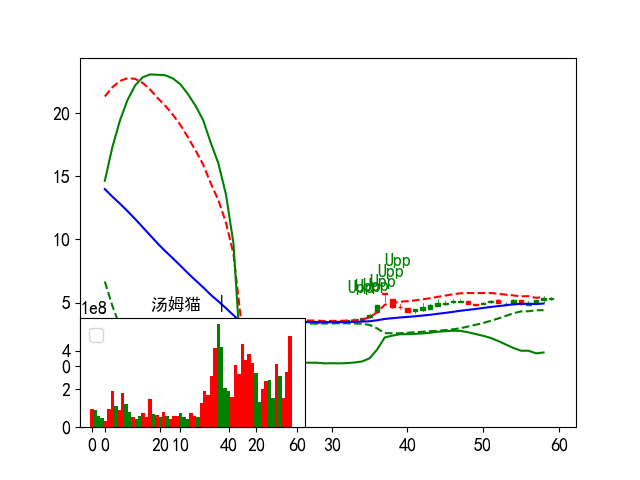

In [49]:
dfNow.loc['300459'][-2:].upper
print(dfsRoot.loc['300459'][-tail_days:].shape)
show_ohlc_upper(dfsRoot.loc['300459'][-tail_days:],code='300459')

300059 date
2024-11-06    2.59
2024-11-07     NaN
Name: ra_diff, dtype: float64
xratio:0.31 ra_diff:nan
code: 300059


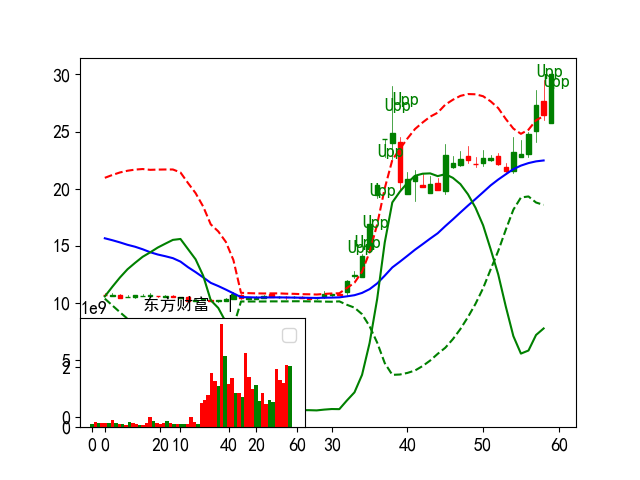

601727 date
2024-11-06    3.05
2024-11-07     NaN
Name: ra_diff, dtype: float64
xratio:0.09 ra_diff:nan
code: 601727


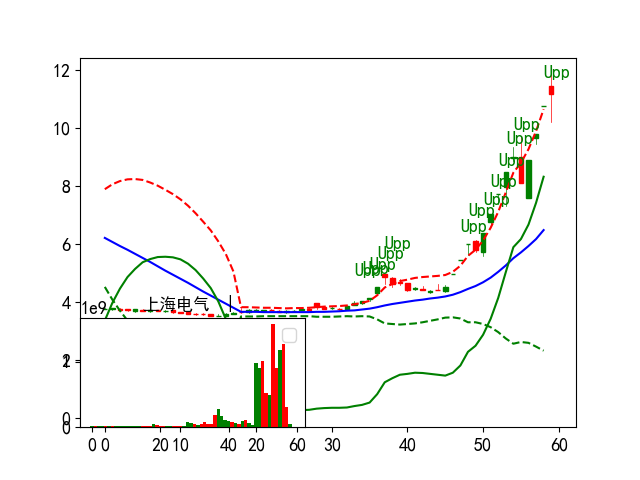

In [50]:
for co in top20_nd.index[:2]:
    print(co,dfNow.loc[co].ra_diff[-2:])
    # show_ohlc_upper(dfs.loc[co][-30:],co)
    show_ohlc_upper(dfsRoot.loc[co][-tail_days:],co)

In [51]:
code_df = '600519'
dfNow_t2 = dfNow.groupby(level=[0]).tail(2)
# dfNow_f = dfNow_t2[ (dfNow_t2.idx > dfNow_t2.idx.shift(1)) & (dfNow_t2.xratio > dfNow_t2.xratio.shift(1)) ]
idx = pd.IndexSlice
mask_df =  ((dfNow_t2.idx > dfNow_t2.idx.shift(1)) & (dfNow_t2.xratio > dfNow_t2.xratio.shift(1)) )

dfNow_t2 = dfNow_t2.loc[idx[mask_df, :]]

group250 = dfNow_t2.groupby(level=[0])
dfNow_f = group250.tail(1).reset_index().set_index('code')
mask_df = (dfNow_f.date >= cct.get_today())
dfNow_f = dfNow_f.loc[idx[mask_df, :]]
dfNow_f[:2]

date  open   high    low  close    vol  amount  ra_diff   ma10  \
code                                                                          
689009 2024-11-07  44.1  45.55  44.02   45.1  11.66    5.24      NaN  42.39   
688778 2024-11-07  48.0  51.80  45.91   51.0  27.10   13.79      NaN  38.66   

          ma5  ...  vol1d   vol2d  vol3d  vol4d  vol5d  volsum5d  ma51d  name  \
code           ...                                                              
689009  41.84  ... -100.0   -3.16  22.86  52.83 -44.14     -71.6    NaN  九号公司   
688778  41.58  ... -100.0  188.74   4.28  14.42  15.63     123.1    NaN  厦钨新能   

        xratio    idx  
code                   
689009   -0.27  -0.28  
688778    0.28  14.60  

[2 rows x 33 columns]

In [52]:
# dfNow_f.shape,dfNow_f[:3],dfNow_t2.loc['600812'],df.loc['600812'][-2:]
# dfNow_f[dfNow_f.date >= cct.get_today()]
# dfNow_f.loc['000006']
# dfNow_t2.loc['000006']
# (dfNow_t2.loc[code_df].idx > dfNow_t2.loc[code_df].idx.shift(1)) 
# (dfNow_t2.loc[code_df].xratio > dfNow_t2.loc[code_df].xratio.shift(1))
# dfNow_f.loc[code_df],dfNow.loc[code_df]

### pandas multiinde drop last row

In [53]:
df.loc['000002'][-2:]

open  high   low  close          vol        amount  ra_diff
date                                                                   
2024-11-05  9.03  9.44  9.01   9.34  287499777.0  2.665166e+09     1.50
2024-11-06  9.29  9.70  9.11   9.50  395135528.0  3.714561e+09     1.53

In [54]:
dfNow.loc['000002'][-2:]

open  high   low  close           vol        amount  ra_diff  \
date                                                                       
2024-11-06  9.29  9.70  9.11   9.50  3.951355e+08  3.714561e+09     1.53   
2024-11-07  9.40  9.92  9.36   9.89  5.072800e+02  4.936000e+01      NaN   

            ma10   ma5  ma20  ...   vol1d  vol2d  vol3d  vol4d  vol5d  \
date                          ...                                       
2024-11-06  9.23  9.26  9.27  ...   37.44  48.42 -27.36 -23.87  50.33   
2024-11-07  9.31  9.38  9.31  ... -100.00  37.44  48.42 -27.36 -23.87   

            volsum5d  ma51d  name  xratio   idx  
date                                             
2024-11-06      85.0   9.26   NaN   -0.01  0.38  
2024-11-07     -65.4    NaN  万 科Ａ   -0.01  0.75  

[2 rows x 32 columns]

# 基础处理

In [55]:
# show_tdx_data(dfs.loc['600519'][-2:])
dfs = dfNow.fillna(0)
groupd = dfs.groupby(level=[0])
single = False
dt_low = None
df_idx = None
if single:
    dfs_dtlen = groupd.tail(1)
    print("dfs tail1")
else:
    single = True
    dl = 30
    dindex = tdd.get_tdx_Exp_day_to_df(
        '999999', dl=dl, resample=resample).sort_index(ascending=False)
    dt = tdd.get_duration_price_date('999999', df=dindex)

    dt = dindex[dindex.index >= dt].index.values
    dt_low = dt[-1]
    print('dt_low:%s %s' % (dt_low,dt[0]))
    dtlen = len(dt) if len(dt) > 0 else 1
    dfs_dtlen = groupd.tail(dtlen)
    # import ipdb;ipdb.set_trace()
    dfs_dtlen[-2:]
    df_idx = get_groupby_mean_median_close(dfs_dtlen)

    # print(("dfs tail:%s dt:%s" % (dtlen, dt)))
    dfs_dtlen = get_multi_date_duration(dfs_dtlen, dt[-1])

# groupd2 = dfs.groupby(level=[0])
# dfs['ma%d'%cumdays] = groupd['close'].apply(pd.rolling_mean, cumdays)

# dfs.reset_index().groupby(['code'])['date'].transform('count')
# single = True

print("Low:%s" % (dt[-1]))
# dfs_dtlen.loc['999999'].reset_index().date
lastday_week = dfs_dtlen.loc['999999'].reset_index().date[0]
lastday_week
# dfs_dtlen[('ma%s') % (rollma[-1])][-2:]
# print(df_idx)

dt_low:2024-09-26 2024-11-06


open   high    low  close           vol        amount  \
code   date                                                                 
000001 2024-11-06  11.62  11.64  11.47  11.55  1.462286e+08  1.689978e+09   
       2024-11-07  11.50  11.93  11.48  11.91  2.242800e+02  2.620000e+01   

                   ra_diff   ma10    ma5   ma20  ...  vol1d  vol2d  vol3d  \
code   date                                      ...                        
000001 2024-11-06      1.2  11.54  11.49  11.73  ...  -12.2  47.18 -28.83   
       2024-11-07      0.0  11.56  11.60  11.72  ... -100.0 -12.20  47.18   

                   vol4d  vol5d  volsum5d  ma51d  name  xratio  idx  
code   date                                                          
000001 2024-11-06  27.16 -15.66      17.7  11.49     0   -0.03 -0.2  
       2024-11-07 -28.83  27.16     -66.7   0.00  平安银行   -0.03  0.2  

[2 rows x 32 columns]

Low:2024-09-26


Timestamp('2024-09-26 00:00:00')

In [56]:
time_s = time.time()
# rollma

def get_mask_df(dfs):
    dfs = dfs.fillna(0)
    idx = pd.IndexSlice
    # mask = (dfs[('ma%s')%(rollma[0])] > dfs[('ma%s')%(rollma[1])]) & (dfs[('ma%s')%(rollma[-1])] > 0) & (dfs[('close')] > dfs[('ma%s')%(rollma[0])])  & (dfs[('close')] > dfs[('ma%s')%(rollma[-1])])
    # mask = (dfs[('ma%s')%(rollma[0])] > dfs[('ma%s')%(rollma[1])]) & (dfs[('ma%s')%(rollma[-1])] > 0) & (dfs[('close')] > dfs[('ma%s')%(rollma[1])])  & (dfs[('close')] > dfs[('ma%s')%(rollma[-1])])
    # mask = (dfs[('ma%s')%(rollma[0])] > dfs[('ma%s')%(rollma[1])]) & (dfs[('ma%s')%(rollma[-1])] > 0) &  (dfs[('close')] > dfs[('ma%s')%(rollma[-1])])

    # mask = ( (dfs[('ma%s')%(rollma[0])] > 0) & (dfs[('ma%s')%(rollma[-1])] > 0) & (dfs[('close')] > dfs[('ma%s')%(rollma[-1])]) & (dfs[('close')] > dfs[('ma%s')%(rollma[0])]))
    # mask = ( (dfs[('ma%s')%(rollma[0])] > 0) & (dfs[('ma%s')%(rollma[-1])] > 0)
    #         & (dfs[('close')] > dfs[('ma%s')%(rollma[-1])]*ma_250_l)
    #         & (dfs[('close')] < dfs[('ma%s')%(rollma[-1])]*ma_250_h)
    #         & (dfs[('close')] > dfs[('ma%s')%(rollma[0])]))

    # & (dfs['mean'] > dfs['median'])
    # & (dfs['close'] > dfs['mean'])

    if len(rollma) > 1:

        mask = ((dfs[('ma%s') % (rollma[0])] > 0) & (dfs[('ma%s') % (rollma[-1])] > 0) &
                (dfs[('ma%s') % (rollma[0])] > dfs[('ma%s') % (rollma[-1])]) &
                (dfs[('close')] > dfs[('ma%s') % (rollma[0])]) &
                (dfs[('close')] > dfs[('ma%s') % (rollma[-1])]*ma_250_h) &
                ((dfs[('close')] > dfs['boll']) | (dfs[('close')] > dfs['upper']))
                )
    else:
        mask = ((dfs[('ma%s') % (rollma[0])] > 0) &
                (dfs[('close')] > dfs[('ma%s')%(rollma[0])]) &
                ((dfs[('close')] > dfs['boll']) | (dfs[('close')] > dfs['upper']) )
                )

    return dfs.loc[idx[mask, :]]

# mask = ((dfs[('close')] > dfs[('ma%s')%(rollma[-1])]))


df_mask = get_mask_df(dfs_dtlen)
print(df_mask.shape)
df_mask = get_multi_code_count(df_mask)
print((df_mask.couts[:5], df_mask.shape))

# import ipdb;ipdb.set_trace()
# df.sort_values(by='couts',ascending=0)
# groupd.first()[:2],groupd.last()[:2]
# groupd = df250.groupby(level=[0])
# '''
# groupd.transform(lambda x: x.iloc[-1])
# groupd.last()
# groupd.apply(lambda x: x.close > x.ma250)
# df.shape,df.sort_index(ascending=False)[:5]
# ?groupd.agg
# groupd = df.groupby(level=[0])
# groupd['close'].apply(pd.rolling_mean, 250, min_periods=1)
# ex:# Group df by df.platoon, then apply a rolling mean lambda function to df.casualties
# df.groupby('Platoon')['Casualties'].apply(lambda x:x.rolling(center=False,window=2).mean())

code_uniquelist = df_mask.index.get_level_values('code').unique()
code_select = code_uniquelist[random.randint(0, len(code_uniquelist) - 1)]

# if app:
#     print(round(time.time() - time_s, 2), 's', df.index.get_level_values(
#         'code').unique().shape, code_select, df.loc[code_select][-1:])

if single:
    # groupd = df.groupby(level=[0])
    if tdx:
        # block_path = tdd.get_tdx_dir_blocknew() + '060.blk'
        # if cct.get_work_time():
        #     codew = df[df.date == cct.get_today()].index.tolist()

        if dt_low is not None:

            groupd2 = df_mask.groupby(level=[0])
            df_mask = groupd2.tail(1)
            df_mask = df_mask.reset_index().set_index('code')
            # import ipdb;ipdb.set_trace()

            # df = df[(df.date >= dt_low) & (df.date <= cct.get_today())]
            dd = df_mask[(df_mask.date == dt_low)]
            # df = df[(df_mask.date >= cct.last_tddate(1))]
            df_mask = df_mask[(df_mask.date >= df_mask.date.max())]
            # import ipdb;ipdb.set_trace()
            print(("dt_low:%s df:%s %s df_idx:%s" %
                  (dt_low,len(df_mask), df_mask.index[:5], len(df_idx))))


                
            print(("Main Down dd :%s MainUP df:%s couts std:%0.1f " %
                  (len(dd), len(df_mask), df_mask.couts.std())))
            # print df.date.mode()[0]
            if len(df_mask) > 0:
                if df_idx is not None and len(df_mask) > 0 and len(df_idx) > 0:
                    idx_set_ = [x for x in df_idx.index if x in df_mask.index]
                    # df_mask = df_mask.loc[idx_set_, :].dropna()
                df_mask = df_mask.sort_values(by='couts', ascending=1)
                df_mask = df_mask[df_mask.couts > df_mask.couts.std()]
            else:
                print("df_mask is None:%s"%(len(df_mask)))
            # df = df[(df.date >= df.date.mode()[0]) & (df.date <= cct.get_today())]
            codew = df_mask.index.tolist()

            if app:
                print(
                    "time: %s  %s" %
                    (round(time.time() - time_s, 2), len(df_mask)))

        else:
            df_mask = df_mask.reset_index().set_index('code')
            df_mask = df_mask[(df_mask.date >= cct.last_tddate(days=10)) &
                              (df_mask.date <= cct.get_today())]
            codew = df_mask.index.tolist()

        top_temp = tdd.get_sina_datadf_cnamedf(codew, df_mask)
        top_temp = top_temp[(~top_temp.index.str.contains(
            '688')) & (~top_temp.name.str.contains('ST'))]
        top_temp = top_temp.sort_values(by=['couts'], ascending=[0])
        codew = top_temp.index.tolist()

        # clean st and 688

    # df['date'] = df['date'].apply(lambda x:(x.replace('-','')))
    # df['date'] = df['date'].astype(int)
    # print df_mask.loc[code_select].T,df_mask.shape
#     MultiIndex = False
# else:
#     MultiIndex = True

(29661, 32)
count dd.couts
(code    date      
688502  2024-09-27    24
603360  2024-09-27    24
600563  2024-09-27    24
600418  2024-09-27    24
600316  2024-09-27    24
Name: couts, dtype: int64, (29661, 33))
dt_low:2024-09-26 df:1405 Index(['688502', '603360', '600563', '600418', '600316'], dtype='object', name='code') df_idx:2721
Main Down dd :0 MainUP df:1405 couts std:5.2 
time: 0.11  1298


In [57]:
dfs_dtlen.loc['002987'][-1:]

open   high    low  close    vol  amount  ra_diff   ma10    ma5  \
date                                                                           
2024-11-07  15.45  16.04  15.25  15.99  32.76    5.11      0.0  15.38  15.22   

             ma20  ...  vol1d  vol2d  vol3d  vol4d  vol5d  volsum5d  ma51d  \
date               ...                                                       
2024-11-07  15.82  ... -100.0  48.04  17.21 -38.86  -3.22     -76.8    0.0   

            name  xratio   idx  
date                            
2024-11-07   京北方   -0.01  0.65  

[1 rows x 32 columns]

## 最近60天筛选

In [58]:
# 截取最后5天数据
dfs_tail = dfs.groupby(level=[0]).tail(tail_days)
# 还原多索引
# dfs_tail = dfs_tail.reset_index().set_index(['code','date'])
# dfs_tail[dfs_tail.ra_diff > 2]

### filter mask250 get_level_values

In [59]:
mask250 = ((dfs_tail[('ma%s') % (rollma[0])] > 0) & (dfs_tail[('ma%s') % (rollma[-1])] > 0) &
           (dfs_tail[('close')] > dfs_tail[('ma%s') % (rollma[0])])
            & (dfs_tail[('close')] > dfs_tail[('ma%s') % (rollma[-1])]*1.03)
              & (dfs_tail[('close')] < dfs_tail[('ma%s') % (rollma[-1])]*1.1)
                & (dfs_tail[('close')] > dfs_tail[('ma20')])
           & (dfs_tail[('close')] < dfs_tail[('ma20'   )]*1.1))
idx = pd.IndexSlice
df_mask250 = dfs_tail.loc[idx[mask250, :]]
print(df_mask250.shape)
df_mask250 = get_multi_code_count(df_mask250)
print((df_mask250.couts[:1], df_mask250.shape))

groupd250 = df_mask250.groupby(level=[0])
df_mask250 = groupd250.tail(1)
# df_mask250 = df_mask250[df_mask250.index.get_level_values(1) > str(df_mask250.loc['999999'].index[0])[:10] ]
# df_mask250 = clean_688(df_mask250)

# df_mask250['idx'] = df_idx_detect
print((df_mask250.couts[:2], df_mask250.shape))
# print(df_mask.loc['002987'])
df_mask250 = df_mask250.sort_values(
        by=['ra_diff','hat', 'couts'],
        ascending=[0,0, 0])
show_tdx_data(
    df_mask250)[:3]

(1315, 32)
count dd.couts
(code    date      
002609  2024-10-11    11
Name: couts, dtype: int64, (1315, 33))
(code    date      
600859  2024-11-06    11
002609  2024-11-06    11
Name: couts, dtype: int64, (415, 33))
Count:415 33


name  couts  ra_diff  xratio   idx    hat  close  volsum5d  \
code   date                                                                    
300561 2024-10-28    0      1     2.71    0.00  0.00  10.95  20.50     -28.2   
300674 2024-11-05    0      1     2.62    0.41  2.37  10.05  25.50      22.9   
300284 2024-10-17    0      1     2.08    0.00  0.00   8.93  12.36     122.8   

                    hmax   lmin  perc1d   ma20  ma250  vol1d  vol2d   vol3d  \
code   date                                                                   
300561 2024-10-28  28.00  10.11    5.56  19.22  18.80  49.29 -15.06  -23.72   
300674 2024-11-05  29.34  17.16    9.16  23.59  24.25  78.81 -33.86  -32.73   
300284 2024-10-17  13.93   5.83    3.95  11.47  11.88  -3.61  15.43  156.26   

                   vol4d  vol5d  perc3d  perc5d  
code   date                                      
300561 2024-10-28   0.12 -38.87    0.64   -4.61  
300674 2024-11-05  23.15 -12.45   -0.70    4.25  
300284 2024-10-17  -3.93 -41.38   30.38   28.88

#### filter today

In [60]:
df_mask250  = df_mask250[(df_mask250.xratio > 0) & (df_mask250.index.get_level_values('date') > cct.get_today() )]
# df_tail1[df_tail1.index.get_level_values('date') == cct.get_today()].shape


In [61]:
# df_mask250.index.get_level_values(1) > str(df_mask250.loc['999999'].index[0])[:10]

#### debug ra_diff4

In [62]:
dfs.loc['301073'][-5:].ra_diff

date
2024-11-01    1.72
2024-11-04    1.62
2024-11-05    1.63
2024-11-06    1.67
2024-11-07    0.00
Name: ra_diff, dtype: float64

xratio:0.07 ra_diff:nan
code: 000002


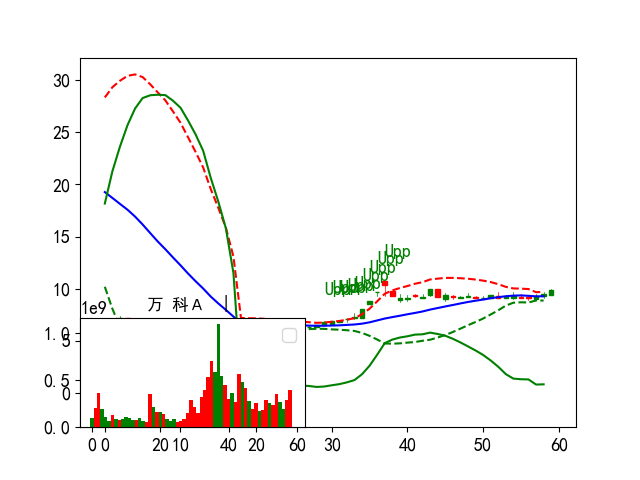

In [63]:
# dfs.loc['000002'][-60:]
show_ohlc_upper(dfsRoot.loc['000002'][-60:],code='000002')
for co in df_mask250.index.get_level_values(0)[:10]:
    print(co,dfs.loc[co].ra_diff[-1])
    show_ohlc_upper(dfsRoot.loc[co][-tail_days:],code=co)

## 最近60天数据

In [64]:
dfs_tail9 = dfs.groupby(level=[0]).tail(tail_days)

# 提取倒数第二天
# dfs_tail9 = dfs.groupby(level=[0]).tail(6)
# dfs_tail9 = dfs_tail9[dfs_tail9.index.get_level_values(1) <lastday]


# dfs_tail9.index.get_level_values(0)
# 还原多索引
# dfs_tail = dfs_tail.reset_index().set_index(['code','date'])
# print(dfs_tail9.loc['002987'][:1])
# show_tdx_data(dfs_tail9.loc[code_t])
# dfs_tail9=compute_perd_value(dfs_tail9,market_value=5,col='vol')

# show_tdx_data(dfs_tail9.loc[code_t])
# print((dfs_tail9.loc[code_t]))

In [65]:
dfs_tail9.loc[(['999999','399001','399006'],'ra_diff')].groupby(level=0).tail(3)
# dfs_tail9.loc[pd.IndexSlice[['999999','399001','399006'], :, :]].tail(3)
# dfs_tail9.query(("code == '999999'" and "date > '2023-04-01'"))

code    date      
999999  2024-11-04    1.22
        2024-11-05    1.25
        2024-11-06    1.25
399001  2024-11-04    1.34
        2024-11-05    1.38
        2024-11-06    1.37
399006  2024-11-04    1.37
        2024-11-05    1.44
        2024-11-06    1.42
Name: ra_diff, dtype: float64

## 超跌反弹年线大于MA20

In [66]:
# show_tdx_data(dfs_tail9.loc['300418'])[-2:]
show_tdx_data(dfs_tail9.loc['603131'])[-2:]
# print(dfs_tail9.loc['603131',['high','upper','hmax']])

Count:30 32


name  ra_diff  xratio   idx   hat  close  volsum5d   hmax  lmin  \
date                                                                          
2024-11-06     0     1.49    0.14  2.21  4.81  18.83      16.7  19.56  14.2   
2024-11-07  上海沪工     0.00    0.14  2.01  0.00  18.64     -75.4   0.00   0.0   

            perc1d   ma20  ma250   vol1d  vol2d  vol3d  vol4d  vol5d  perc3d  \
date                                                                           
2024-11-06    5.20  16.56  10.92   67.66  33.83 -41.64 -35.20  -7.98   13.50   
2024-11-07   -1.01  16.73   0.00 -100.00  67.66  33.83 -41.64 -35.20    8.69   

            perc5d  
date                
2024-11-06    4.67  
2024-11-07    2.08

## !!! Run-Filter强势Upper

### !!! filterRule test

In [67]:
# dfs_tail9.loc['002722']


def rules_to_list(rules):
    rules_l = (rules).split('&')
    for l in rules_l:
        print(l)
    return rules_l


def filter_rule_Test(dfs_tail9,resample=resample):
    col_rule = ["(dfs_tail9[('close')] > dfs_tail9[('ma5')])",
                "(dfs_tail9[('high')] > dfs_tail9.upper)",
                "(dfs_tail9[('ma5')] > dfs_tail9[('ma20')])"]
    col_rule2 = [
        "(dfs_tail9[('close')] > dfs_tail9[('hmax')].shift(1)*0.98) | (dfs_tail9['close'] > dfs_tail9['hmax']*0.97)",
        "((dfs_tail9[('vol1d')] > 0) | (dfs_tail9.close > dfs_tail9.close.shift(1)*0.99))"]
    col_rule3 = [
        "((dfs_tail9[('vol2d')] > 0) | (dfs_tail9.close.shift(1) > dfs_tail9.close.shift(2)*0.99))"]

    col_rule_tail1 = ["(dfs_tail9.perc1d < 21)", "(dfs_tail9.perc2d > 0)"]
    if resample.upper()=='D':
        col_rule_tail2 = [
            "((dfs_tail9.perc3d > 0) | ((dfs_tail9.close.shift(2) > dfs_tail9.ma5.shift(2))) )",
            "((dfs_tail9.volsum5d > 50) )",
            "(dfs_tail9['close'] > dfs_tail9[('hmax')])",
            "(dfs_tail9[('close')] > dfs_tail9[('ma250')])",
            "(dfs_tail9['low'] > dfs_tail9[('low')].shift(1))"]
        col_rule_tail3 = ["(dfs_tail9[('hmax')] > 0)",
                 "(dfs_tail9[('high')] >= dfs_tail9[('hmax')])",
                 "(dfs_tail9[('close')] > dfs_tail9.ma250 * 0.99)"]
    else:
        col_rule_tail2 = [
            "((dfs_tail9.perc3d > 0) | ((dfs_tail9.close.shift(2) > dfs_tail9.ma5.shift(2))) )",
            "((dfs_tail9.volsum5d > 50) )",
            "(dfs_tail9['close'] > dfs_tail9[('hmax')])",
            "(dfs_tail9['low'] > dfs_tail9[('low')].shift(1))"]
        col_rule_tail3 = ["(dfs_tail9[('hmax')] > 0)",
                 "(dfs_tail9[('high')] >= dfs_tail9[('hmax')])"]
    col_rule_tail4=[ "(dfs_tail9[('xratio')] > dfs_tail9[('xratio')].shift(1))",
             "(dfs_tail9[('xratio')].shift(1) > dfs_tail9[('xratio')].shift(2))"]
    
    col_rule.extend(col_rule2)
    col_rule.extend(col_rule3)
    col_rule.extend(col_rule_tail1)
    col_rule.extend(col_rule_tail2)
    col_rule.extend(col_rule_tail3)
    col_rule.extend(col_rule_tail4)
    
    for co in col_rule:
        print("%s:%s" % (co, eval(co)), end='')



30
9 0.01 0.1


'Bull'

0.1

date
2024-11-01    0.01
2024-11-04    0.00
2024-11-05   -0.00
2024-11-06   -0.00
2024-11-07   -0.00
Name: xratio, dtype: float64

xratio:0.02 ra_diff:nan
code: 601728


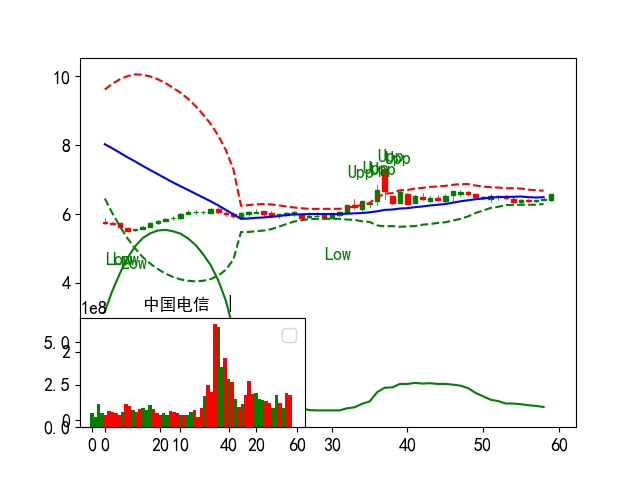

In [68]:
code_filter = '601728'

print(len(dfs_tail9.loc[code_filter]))

# show_tdx_data(dfs_tail9.loc[code_filter])
detect_bull_bear(dfs.loc[code_filter][-120:].close)
detect_bull_bear_apply(dfs.loc[code_filter][-120:].close)

dfs.loc[code_filter].xratio[-5:]

# filter_rule_Test(dfs_tail9.loc[code_filter])

show_ohlc_upper(dfsRoot.loc[code_filter][-60:], code=code_filter)



In [69]:
# dfs.loc['300474'][-5:]

### 新高Hmax日见新高df_mask_hmax

#### hmax 追高

30
xratio:-0.02 ra_diff:nan
code: 600012


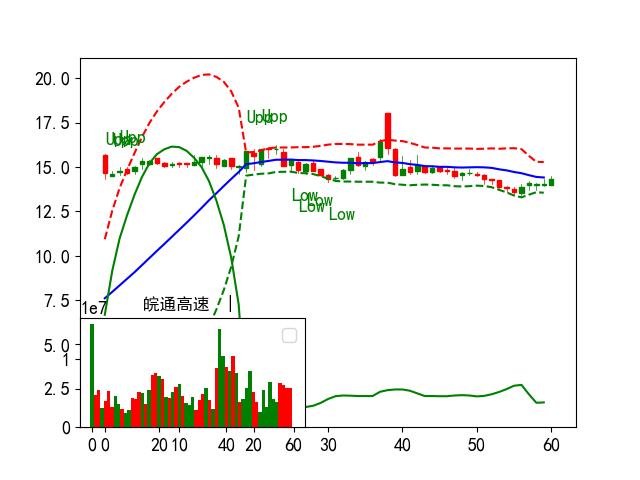

In [70]:
code='600012'
print(len(dfs_tail9.loc[code]))
# show_tdx_data(dfs_tail9.loc[code],col='upper')
show_ohlc_upper(dfsRoot.loc[code],code=code)

In [71]:

# mask_hmax = ((dfs_tail9[('close')] > dfs_tail9[('hmax')].shift(
#     1) * 0.99) | (dfs_tail9['close'] > dfs_tail9['hmax'] * 0.99))

# mask_hmax = ( (dfs_tail9[('hmax')] > 0) & ((dfs_tail9[('high')] > dfs_tail9[('hmax')].shift(
#     1) * 0.99) | (dfs_tail9['high'] > dfs_tail9['hmax'] * 0.99)) )

# mask_hmax = ((dfs_tail9[('hmax')] > 0) &

if resample.upper() =='D':
    mask_hmax = ( (dfs_tail9[('high')] > dfs_tail9[('hmax')].shift(1)) &
                 ((dfs_tail9[('high')] >= dfs_tail9[('hmax')])) &
                 (dfs_tail9[('close')] > dfs_tail9.ma250 * 0.99))
                 # (dfs_tail9[('close')] > dfs_tail9.ma250 * 0.99) &
                 # (dfs_tail9[('close')] < dfs_tail9.ma250 * 1.05))
else:
    mask_hmax = ( (dfs_tail9[('low')] >= dfs_tail9[('ma5')].shift(1))  &
              (dfs_tail9[('high')] >= dfs_tail9[('high')].shift(1))  ) 

# mask_hmax = ( (dfs_tail9[('hmax')] > 0) & (dfs_tail9[('close')] > dfs_tail9.ma20 *0.99) & (dfs_tail9[('close')] < dfs_tail9.ma20 *1.20) )


df_mask_hmax = dfs_tail9.loc[idx[mask_hmax, :]]
df_mask_hmax = get_multi_code_count(df_mask_hmax)

# df_mask_hmax = df_mask_hmax[ (df_mask_hmax[('close')] > df_mask_hmax.upper)]

# df_mask_hmax.couts.std()

df_mask_hmax = df_mask_hmax.groupby(level=[0]).tail(
    1).reset_index().set_index('code')

df_mask_hmax = df_mask_hmax[df_mask_hmax.date >= lastday]
# df_mask_hmax = get_sina_data_cname(df_mask_hmax, dm,realtime=True)
df_mask_hmax = get_sina_data_cname(df_mask_hmax, realtime=True)

df_mask_hmax = clean_688(df_mask_hmax)

# show_tdx_data(df_mask_hmax[df_mask_hmax.couts == 9])

# by=['perc', 'perc5d', 'perc1d'],
# code_t = '000534'
df_mask_hmax = df_mask_hmax.sort_values(
    by=['couts','volsum5d', 'idx', 'hat', 'perc1d'],ascending=[0,0, 0, 0, 0])
    # by=['volsum5d', 'idx', 'hat', 'perc1d'],ascending=[0, 0, 0, 0])
# print(df_mask_hmax.couts[:1], df_mask_hmax.shape)
# show_tdx_data(df_mask_hmax.loc['300461'])
df_mask_hmax.couts[:1], df_mask_hmax.shape
show_tdx_data(df_mask_hmax)[:10]
# show_tdx_data(df_mask_hmax[(df_mask_hmax.couts > 1) & (df_mask_hmax.volsum5d > 10) & (df_mask_hmax.volsum5d < 150)]).T

count dd.couts
compute percent


(code
 002625    19
 Name: couts, dtype: int64,
 (1562, 41))

Count:1562 41


name  couts       date   perc  ra_diff  xratio    idx    hat  close  \
code                                                                          
002625  光启技术     19 2024-11-06  -4.06     3.03    0.97   9.29  25.08  45.57   
000066  中国长城     17 2024-11-07  10.01     0.00    0.39   8.94   0.00  20.33   
001207  联科科技     16 2024-11-07   9.98     0.00    0.29   3.64   0.00  23.14   
600835  上海机电     16 2024-11-07  -4.08     0.00    0.29   3.45   0.00  20.00   
600619  海立股份     15 2024-11-07  10.01     0.00    0.24   7.04   0.00  16.93   
600570  恒生电子     15 2024-11-07   6.92     0.00    0.19   6.22   0.00  32.60   
603019  中科曙光     15 2024-11-07   4.84     0.00    0.88  21.18   0.00  75.60   
002428  云南锗业     14 2024-11-07  10.00     0.00    0.56  13.61   0.00  29.60   
603737   三棵树     14 2024-11-07   0.62     0.00    0.52   9.12   0.00  52.27   
600363  联创光电     13 2024-11-06 -10.00     2.80    1.24  28.75  41.95  55.60   

        volsum5d  ...  ma250     nclose   llow   vol1d    vol2d   vol3d  \
code              ...                                                     
002625      36.6  ...  11.38  45.395239  45.64    0.95    39.60  -27.19   
000066     -19.1  ...   0.00  19.255451  17.61 -100.00     9.32   15.71   
001207     -83.8  ...   0.00  22.425303  20.66 -100.00    -8.64    2.88   
600835    -133.4  ...   0.00  20.026070  18.81 -100.00   -46.68   17.26   
600619    1617.9  ...   0.00  16.523327  14.00 -100.00  1868.46  -80.37   
600570      69.6  ...   0.00  30.289742  29.09 -100.00    44.13  183.30   
603019     -95.7  ...   0.00  71.588792  69.10 -100.00   -11.23   33.95   
002428      62.0  ...   0.00  29.083333  25.20 -100.00   133.35  -52.30   
603737    -103.8  ...   0.00  52.391562  50.60 -100.00     8.74    3.74   
600363     839.9  ...  11.56  56.139928  61.78  206.80   -90.35  -80.22   

         vol4d  vol5d  perc3d  perc5d  
code                                   
002625   -1.91  25.17   20.10   15.57  
000066  -20.60  76.45   28.35   28.10  
001207   28.35  -6.44    8.08   15.70  
600835   11.15 -15.11   12.99    6.10  
600619  -86.00  15.79   33.10   47.86  
600570  -30.93 -26.90   23.02   21.60  
603019   -9.70  -8.73   13.68   23.53  
002428   85.00  -4.00   26.39   52.97  
603737    4.33 -20.62   11.62   17.20  
600363  865.48 -61.78   33.12   45.43  

[10 rows x 24 columns]

#### !!! hmax Top upper > 1

In [72]:
# dfs_tail9.loc['600103']

In [73]:
# mask_hmax = ((dfs_tail9[('close')] > dfs_tail9[('hmax')].shift(
#     1) * 0.99) | (dfs_tail9['close'] > dfs_tail9['hmax'] * 0.99))

# mask_hmax = ( (dfs_tail9[('hmax')] > 0) & ((dfs_tail9[('high')] > dfs_tail9[('hmax')].shift(
#     1) * 0.99) | (dfs_tail9['high'] > dfs_tail9['hmax'] * 0.99)) )

# mask_hmax = ( (dfs_tail9[('hmax')] > 0) & ((dfs_tail9[('high')] >= dfs_tail9[('hmax')]*0.99) ) )
# mask_hmax = (  (dfs_tail9[('high')] >= dfs_tail9[('hmax')]*0.99) )
if resample.upper() == 'D':
    mask_hmax = (  (dfs_tail9[('high')] >= dfs_tail9[('high')].shift(1)) & 
                 (dfs_tail9[('high')].shift(1) >= dfs_tail9[('high')].shift(2)) &
                (dfs_tail9[('high')] >= dfs_tail9[('hmax')]*0.99) &
                (dfs_tail9[('close')] >= dfs_tail9[('upper')].shift(1)) )
else:
    mask_hmax = (  (dfs_tail9[('high')] >= dfs_tail9[('high')].shift(1)) & 
                 (dfs_tail9[('high')].shift(1) >= dfs_tail9[('high')].shift(2)) &
                (dfs_tail9[('close')] >= dfs_tail9[('upper')].shift(1)) )

df_mask_hmax = dfs_tail9.loc[idx[mask_hmax, :]]

#站上Upper
# df_mask_hmax = df_mask_hmax[ (df_mask_hmax[('close')] > df_mask_hmax.upper)]

df_mask_hmax = get_multi_code_count(df_mask_hmax)
df_mask_hmax = df_mask_hmax.groupby(level=[0]).tail(
    1).reset_index().set_index('code')



df_mask_hmax = df_mask_hmax[df_mask_hmax.date >= lastday]
# df_mask_hmax = get_sina_data_cname(df_mask_hmax, dm,realtime=True)
df_mask_hmax = get_sina_data_cname(df_mask_hmax, realtime=True)

df_mask_hmax = clean_688(df_mask_hmax)

# show_tdx_data(df_mask_hmax[df_mask_hmax.couts == 9])

# by=['perc', 'perc5d', 'perc1d'],
# code_t = '000534'
df_mask_hmax = df_mask_hmax.sort_values(
    by=['volsum5d', 'idx', 'hat', 'perc1d'],
    ascending=[0, 0, 0, 0])
print(df_mask_hmax.couts[:1], df_mask_hmax.shape)
# show_tdx_data(df_mask_hmax.loc['000039'])
df_mask_hmax.couts[:1], df_mask_hmax.shape

# show_tdx_data(df_mask_hmax).T
# show_tdx_data(df_mask_hmax[(df_mask_hmax.couts > 1) & (df_mask_hmax.volsum5d > 10) & (df_mask_hmax.volsum5d < 150)])

show_tdx_data(df_mask_hmax[(df_mask_hmax.couts > 1)] )[:10]

count dd.couts
compute percent
code
000536    10
Name: couts, dtype: int64 (1665, 41)


(code
 000536    10
 Name: couts, dtype: int64,
 (1665, 41))

Count:1660 41


name  couts       date   perc  ra_diff  xratio    idx    hat  close  \
code                                                                           
000536   华映科技     10 2024-11-07   9.99     0.00    0.19   5.14   0.00   8.92   
600190   ST锦港      6 2024-11-07   1.68     0.00    0.01   0.39   0.00   1.82   
000584  *ST工智      7 2024-11-07   4.52     0.00    0.05   0.93   0.00   3.24   
600178   东安动力      8 2024-11-06  -9.78     2.18    0.26   5.46   9.50  14.11   
002217  *ST合泰     11 2024-11-07   5.19     0.00    0.04   0.73   0.00   2.23   
300121   阳谷华泰      9 2024-11-06  -4.60     2.61    0.42   7.76  13.46  16.80   
600130   波导股份      8 2024-11-07   1.27     0.00    0.12   2.81   0.00   7.20   
002416    爱施德     10 2024-11-06 -10.00     2.41    0.35  10.75  13.98  19.27   
600318   新力金融     10 2024-11-07  10.01     0.00    0.12   4.16   0.00  12.20   
000415   渤海租赁      8 2024-11-06 -10.06     2.32    0.05   2.12   2.51   4.38   

        volsum5d  ...  ma250     nclose   llow    vol1d    vol2d   vol3d  \
code              ...                                                      
000536    7133.5  ...   0.00   8.802222   7.30  -100.00  1278.61  -92.64   
600190    4348.3  ...   0.00   1.845010   1.75  -100.00  4592.60  -27.75   
000584    3318.3  ...   0.00   3.218065   3.00  -100.00   -81.08  -56.35   
600178    3057.7  ...   7.82  14.169797  15.06     6.39     1.20  -21.71   
002217    2866.3  ...   0.00   2.228808   2.09  -100.00  2958.33  125.73   
300121    2863.6  ...  21.69  17.092852  17.30    -2.21  2806.74  128.76   
600130    2843.5  ...   0.00   7.523862   7.11  -100.00   -63.62  607.15   
002416    2674.5  ...   5.50  19.293534  20.51    24.75   876.41  -95.30   
600318    2441.6  ...   0.00  11.856630  10.52  -100.00  2662.20  -90.39   
000415    2192.4  ...   3.84   4.425835   4.76  2316.45   -73.85  -79.35   

          vol4d    vol5d  perc3d  perc5d  
code                                      
000536   -54.77  6102.27   33.13   61.01  
600190   -67.95   -48.62   12.35   23.81  
000584   -70.78  3626.51   15.30   15.30  
600178  3165.98   -94.19    9.91   12.11  
002217   -54.04   -63.73   16.15   28.16  
300121   -96.57    26.90   21.62   57.65  
600130   -87.75  2487.72   14.10   19.80  
002416    11.54  1857.08   33.15   61.10  
600318   -33.48     3.29   23.36   40.88  
000415    54.36   -25.24   33.06   60.73  

[10 rows x 24 columns]

In [74]:
# show_tdx_data(df_mask_hmax.loc['600103'][-5:])

##### sort_values

In [75]:
show_tdx_data(
    df_mask_hmax.sort_values(
        by=['ra_diff', 'couts', 'idx'],
        ascending=[0, 0, 0]),col='ra_diff')[:20]

Count:1665 41


name  couts       date   perc  ra_diff  ra_diff  xratio    idx    hat  \
code                                                                            
600363  联创光电     10 2024-11-06 -10.00     2.80     2.80    1.24  28.75  41.95   
300121  阳谷华泰      9 2024-11-06  -4.60     2.61     2.61    0.42   7.76  13.46   
300432  富临精工      8 2024-11-06  -2.30     2.59     2.59    0.26   3.00   7.23   
300622  博士眼镜      3 2024-11-06   1.76     2.56     2.56    0.34  10.51  14.70   
603398  沐邦高科      8 2024-11-06   0.70     2.49     2.49    0.38   7.08  12.60   
301091   深城交      5 2024-11-06  -3.68     2.48     2.48    0.95  15.10  28.89   
300748  金力永磁      7 2024-11-06  -4.23     2.43     2.43    0.40   9.10  13.73   
002416   爱施德     10 2024-11-06 -10.00     2.41     2.41    0.35  10.75  13.98   
300035  中科电气      7 2024-11-06  -2.74     2.33     2.33    0.27   6.91   9.29   
000415  渤海租赁      8 2024-11-06 -10.06     2.32     2.32    0.05   2.12   2.51   
300177   中海达      4 2024-11-06  -1.57     2.27     2.27    0.07   1.21   3.00   
002596  海南瑞泽      6 2024-11-06   1.59     2.22     2.22    0.03   0.91   1.30   
600390  五矿资本      8 2024-11-06   1.26     2.19     2.19    0.05   2.00   2.82   
600178  东安动力      8 2024-11-06  -9.78     2.18     2.18    0.26   5.46   9.50   
300607   拓斯达      5 2024-11-06 -11.19     2.14     2.14    0.19   7.93   8.60   
301358  湖南裕能      4 2024-11-06   1.96     2.14     2.14    0.70   9.59  22.98   
300986  志特新材      5 2024-11-06  -1.30     2.12     2.12    0.20   2.36   5.16   
002085  万丰奥威     10 2024-11-06  -8.81     2.11     2.11    0.39   7.22  12.80   
600895  张江高科      9 2024-11-06  -3.33     2.09     2.09    0.33   7.73  11.53   
300618  寒锐钴业      5 2024-11-06  -2.17     2.08     2.08    0.27   8.77  10.60   

        close  ...  ma250     nclose   llow    vol1d    vol2d   vol3d  \
code           ...                                                      
600363  55.60  ...  11.56  56.139928  61.78   206.80   -90.35  -80.22   
300121  16.80  ...  21.69  17.092852  17.30    -2.21  2806.74  128.76   
300432  15.27  ...  12.30  15.167138  15.39   -24.24    18.78  171.04   
300622  37.48  ...  27.24  37.729611  36.70    59.76    32.99   13.62   
603398  27.19  ...  16.27  26.907746  25.45    15.02     1.21   31.80   
301091  59.67  ...  30.99  59.100241  57.26   107.45    40.40  -39.05   
300748  23.55  ...  77.84  23.665009  22.03     5.65    -7.43  156.09   
002416  19.27  ...   5.50  19.293534  20.51    24.75   876.41  -95.30   
300035  17.02  ...  15.98  16.983700  15.51     5.52     7.39   28.66   
000415   4.38  ...   3.84   4.425835   4.76  2316.45   -73.85  -79.35   
300177  13.16  ...   8.89  12.821901  12.20    86.12   108.88  -55.60   
002596   3.20  ...   9.31   3.210460   3.07   189.22   -19.48  -45.27   
600390   8.81  ...   8.83   8.696185   8.45   155.35   -28.30  -24.41   
600178  14.11  ...   7.82  14.169797  15.06     6.39     1.20  -21.71   
300607  18.17  ...  14.23  17.895893  18.71    51.43   270.13   74.00   
301358  52.00  ...  26.08  51.028177  50.25   -17.48   152.88  -28.66   
300986  14.39  ...  14.05  14.563263  13.89    -2.21    -6.35   10.16   
002085  21.95  ...   8.73  22.190073  23.54    17.06   -13.88  -23.72   
600895  32.85  ...  15.93  32.602301  32.20    -0.96    -0.63  -25.50   
300618  43.31  ...  25.10  43.174467  41.61    45.35     9.89  -36.95   

          vol4d    vol5d  perc3d  perc5d  
code                                      
600363   865.48   -61.78   33.12   45.43  
300121   -96.57    26.90   21.62   57.65  
300432     3.97   -37.96   21.63   21.35  
300622   -14.93   -22.89   34.51   17.37  
603398   -34.99    27.75   20.54   27.66  
301091   -19.25     3.52   25.15    9.49  
300748    28.46    -7.74   19.02   40.11  
002416    11.54  1857.08   33.15   61.10  
300035   -26.58     3.55   32.08   25.45  
000415    54.36   -25.24   33.06   60.73  
300177   -10.07    10.96   25.30    8.52  
002596    40.01    15.21   12.90   23.05  
600390    28.34 

xratio:0.15 ra_diff:nan
code: 300540


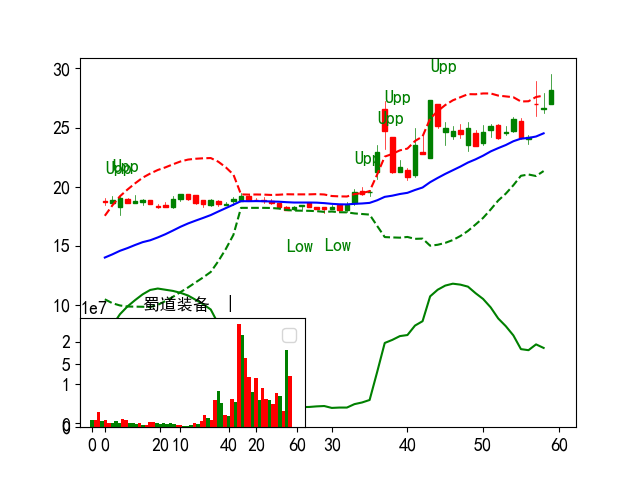

In [76]:
show_ohlc_upper(dfsRoot.loc['300540'][-60:],code='300540')

### !!! df_mask250 upper xratio

In [77]:

if resample.upper() =='D':
    mask250 = ((dfs_tail9[('high')] > dfs_tail9.upper) &
               (dfs_tail9[('close')] > dfs_tail9[('ma5')])
               & (dfs_tail9[('ma5')] > dfs_tail9[('ma20')])
               & ((dfs_tail9[('vol1d')] > 0) | (dfs_tail9.close > dfs_tail9.close.shift( 1)*0.99))
               & ((dfs_tail9[('vol2d')] > 0) | (dfs_tail9.close.shift(1) > dfs_tail9.close.shift(2)*0.99))
               & (dfs_tail9['close'] > dfs_tail9[('hmax')]) &
                (dfs_tail9[('close')] > dfs_tail9[('ma250')]) | ((dfs_tail9[('high')] > dfs_tail9.upper) &
                                                                 (dfs_tail9[('close')] > dfs_tail9[('ma5')])) &
               (dfs_tail9[('ma5')] > dfs_tail9[('ma20')])
               & ((dfs_tail9[('vol1d')] > 0) | (dfs_tail9.close > dfs_tail9.close.shift(1)*0.99))
               & ((dfs_tail9[('vol2d')] > 0) | (dfs_tail9.close.shift(1) > dfs_tail9.close.shift(2)*0.99))
               & (dfs_tail9['low'] > dfs_tail9[('low')].shift(1))
               & (dfs_tail9[('close')] > dfs_tail9[('ma250')])
               & (dfs_tail9[('xratio')] > dfs_tail9[('xratio')].shift(1))
               & (dfs_tail9[('xratio')].shift(1) > dfs_tail9[('xratio')].shift(2))
              )
elif resample.upper() =='W' or resample == 'W-FRI':
    mask250 = (
               (dfs_tail9[('close')] > dfs_tail9[('ma5')])
               & (dfs_tail9[('ma5')] > dfs_tail9[('ma20')])
               & ((dfs_tail9[('vol1d')] > 0) | (dfs_tail9.close > dfs_tail9.close.shift(1)*0.99))
               & ((dfs_tail9[('vol2d')] > 0) | (dfs_tail9.close.shift(1) > dfs_tail9.close.shift(2)*0.99))
               & (dfs_tail9['low'] > dfs_tail9[('low')].shift(1))
               & (dfs_tail9[('xratio')] > dfs_tail9[('xratio')].shift(1))
               & (dfs_tail9[('xratio')].shift(1) > dfs_tail9[('xratio')].shift(2))
              )
else:
    mask250 = (
               (dfs_tail9[('close')] > dfs_tail9[('ma5')])
               & (dfs_tail9[('ma5')] > dfs_tail9[('ma20')])
               & ((dfs_tail9[('vol1d')] > 0) | (dfs_tail9.close > dfs_tail9.close.shift(1)*0.99))
               & ((dfs_tail9[('vol2d')] > 0) | (dfs_tail9.close.shift(1) > dfs_tail9.close.shift(2)*0.99))
               & (dfs_tail9['low'] > dfs_tail9[('low')].shift(1))
              )

# & (dfs_tail9[('close')] < dfs_tail9[('ma20'  )]*1.1))
idx = pd.IndexSlice
df_mask250 = dfs_tail9.loc[idx[mask250, :]]
df_mask250.shape
#站上Upper
df_mask250 = df_mask250[ (df_mask250[('close')] > df_mask250.upper)]

df_mask250 = get_multi_code_count(df_mask250)


code_t = '603131'
print((df_mask250.couts[:3], df_mask250.shape))
# df_mask250.loc[code_t]
groupd250 = df_mask250.groupby(level=[0])
df_mask250 = groupd250.tail(1).reset_index().set_index('code')
# df_mask250 = get_sina_data_cname(df_mask250, dm,realtime=True)



# df_mask250.loc[code_t].close
df_mask250 = get_sina_data_cname(df_mask250, realtime=True)
# df_mask250.loc[code_t].close

df_mask250 = clean_688(df_mask250)
# df_masklastd.loc['002722']

df_mask250 = df_mask250.sort_values(
    by=['idx','xratio',  'hat', 'perc1d'],
    ascending=[0, 0, 0, 0])
    # by=['xratio', 'idx', 'hat', 'perc1d'],

# by=['perc', 'perc5d', 'perc1d'],
# ascending=[0, 0, 0])
print("df_mask250:%s df_mask_hmax:%s"%(len(df_mask250),len(df_mask_hmax)))
cross_hmax_250 = [co for co in df_mask250.index.get_level_values(
    'code') if co in df_mask_hmax.index.get_level_values('code')]
# df_mask250.loc[code_t]
print("cross_hamx:%s" % (len(cross_hmax_250)))

show_tdx_data(df_mask250[df_mask250.couts > 1][:20])
# show_tdx_data(df_mask250.loc[code_t])

(3366, 32)

count dd.couts
(code    date      
688656  2024-10-31    6
002428  2024-10-31    6
688656  2024-11-01    6
Name: couts, dtype: int64, (3302, 33))
compute percent
df_mask250:2849 df_mask_hmax:1665
cross_hamx:1484
Count:20 41


name  couts       date   perc  ra_diff  xratio    idx    hat   close  \
code                                                                           
601127   赛力斯      4 2024-11-07   1.24     0.00    1.96  39.49   0.00  135.87   
002865  钧达股份      2 2024-11-01  -1.74     2.31    1.51  32.67  49.30   71.60   
603268  松发股份      3 2024-11-05 -10.00     4.79    1.71  31.41  53.52   44.17   
600363  联创光电      4 2024-11-06 -10.00     2.80    1.24  28.75  41.95   55.60   
603019  中科曙光      2 2024-11-07   4.84     0.00    0.88  21.18   0.00   75.60   
600536  中国软件      2 2024-11-07  10.00     0.00    0.45  18.45   0.00   59.73   
300377   赢时胜      3 2024-11-07  19.99     0.00    0.51  18.28   0.00   31.57   
600563  法拉电子      3 2024-11-07  -0.35     0.00    1.24  17.07   0.00  133.03   
300127  银河磁体      4 2024-11-07   0.00     0.00    0.57  15.41   0.00   33.77   
002428  云南锗业      6 2024-11-07  10.00     0.00    0.56  13.61   0.00   29.60   
603083  剑桥科技      4 2024-11-07   5.01     0.00    0.59  12.32   0.00   48.64   
603859  能科科技      3 2024-11-07   3.58     0.00    0.37  11.66   0.00   31.21   
002338  奥普光电      3 2024-11-06  -2.51     1.99    0.59  11.55  17.91   46.17   
002156  通富微电      4 2024-11-06  -2.56     1.90    0.34  11.44  14.55   33.84   
603666   亿嘉和      2 2024-11-06  -6.92     2.26    0.28  11.21  13.79   27.99   
603099   长白山      2 2024-11-07   9.99     0.00    0.52  11.13   0.00   44.81   
002416   爱施德      4 2024-11-06 -10.00     2.41    0.35  10.75  13.98   19.27   
002312  川发龙蟒      3 2024-11-05 -10.01     3.69    0.53  10.74  17.09   18.51   
603722   阿科力      5 2024-11-07  -0.64     0.00    0.44  10.53   0.00   49.75   
002384  东山精密      3 2024-11-05  -2.91     1.84    0.47   9.91  14.88   33.35   

        volsum5d  ...  ma250      nclose    llow   vol1d    vol2d   vol3d  \
code              ...                                                       
601127     -21.4  ...   0.00  132.891225  130.00 -100.00    22.70  116.50   
002865     121.2  ...  20.97   70.591000   75.05   30.13   -10.76  -25.92   
603268    3366.9  ...  14.56   45.450884   46.00  -27.94  2401.45   22.70   
600363     839.9  ...  11.56   56.139928   61.78  206.80   -90.35  -80.22   
603019     -95.7  ...   0.00   71.588792   69.10 -100.00   -11.23   33.95   
600536      28.0  ...   0.00   54.802924   51.06 -100.00    85.81    8.41   
300377     114.7  ...   0.00   29.314679   26.00 -100.00    27.58   -8.61   
600563     -70.5  ...   0.00  131.701460  129.80 -100.00     9.36  -41.66   
300127      41.8  ...   0.00   34.202619   30.89 -100.00     9.14    1.48   
002428      62.0  ...   0.00   29.083333   25.20 -100.00   133.35  -52.30   
603083     206.0  ...   0.00   48.474771   44.14 -100.00   -21.28  294.50   
603859     -52.8  ...   0.00   29.836229   27.90 -100.00    45.18  -88.73   
002338      80.0  ...  11.22   45.634678   43.72   37.41   -14.44  -30.44   
002156     114.9  ...  13.62   33.420128   30.29   43.99   -11.48    6.47   
603666      74.0  ...  12.05   29.236753   30.07  -80.76   -26.82  -52.53   
603099      26.6  ...   0.00   44.244170   39.20 -100.00    25.08   -0.08   
002416    2674.5  ...   5.50   19.293534   20.51   24.75   876.41  -95.30   
002312     318.3  ...  10.87   18.517755   21.30   23.03   -24.85  240.30   
603722      88.1  ...   0.00   49.847394   49.06 -100.00     0.89  -26.16   
002384      21.6  ...   9.41   32.917592   32.60    0.29   -14.66   21.39   

         vol4d    vol5d  perc3d  perc5d  
code                                     
601127  -28.32   -32.32    8.42   16.43  
002865    1.88   125.85   19.20   34.85  
603268  -86.13  1056.82   33.13   61.09  
600363  865.48   -61.78   33.12   45.43  
603019   -9.70    -8.73   13.68   23.53  
600536  -32.19    65.92   29.93   31.27  
300377  -12.80   208.53   54.75   97.81  
600563   10.20    51.59    3.20   17.31  
300127   67.19    64.03   44.01   85.24  
002428   85.00    -4.00   26.39   52.97  
603083  -65.44    98.22    8.06   30.75  
603859

df_mask250:105
601127 0.0
xratio:0.74 ra_diff:nan
code: 601127


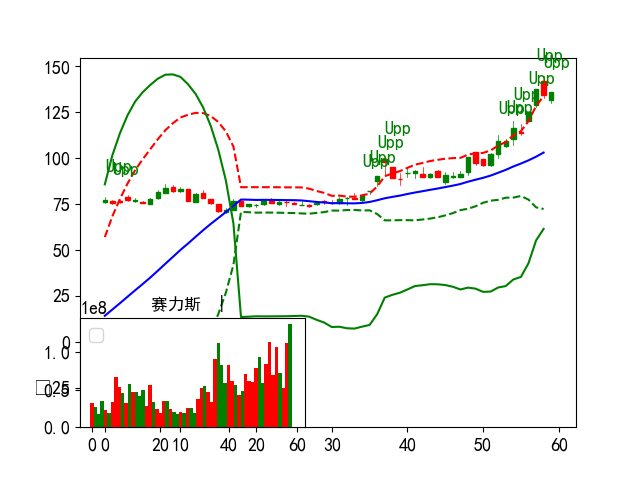

002865 0.0
xratio:0.53 ra_diff:nan
code: 002865


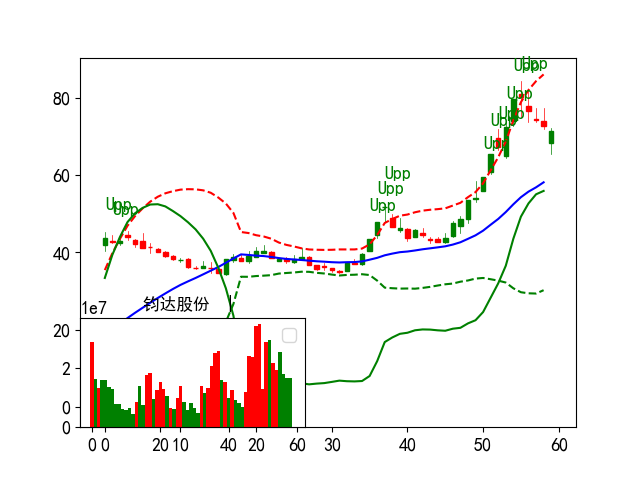

603268 0.0
xratio:0.46 ra_diff:nan
code: 603268


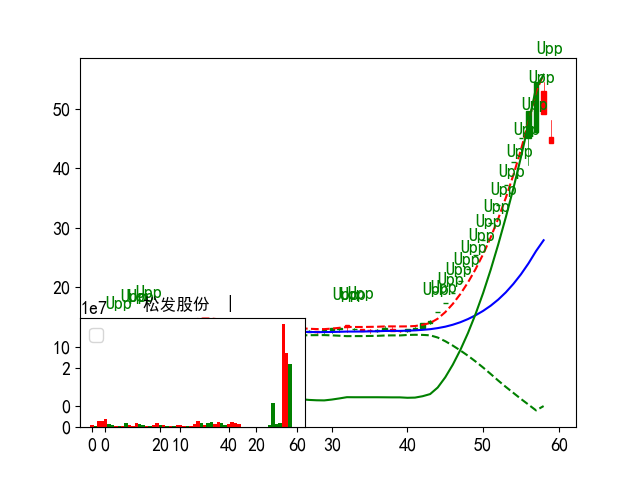

600363 0.0
xratio:0.36 ra_diff:nan
code: 600363


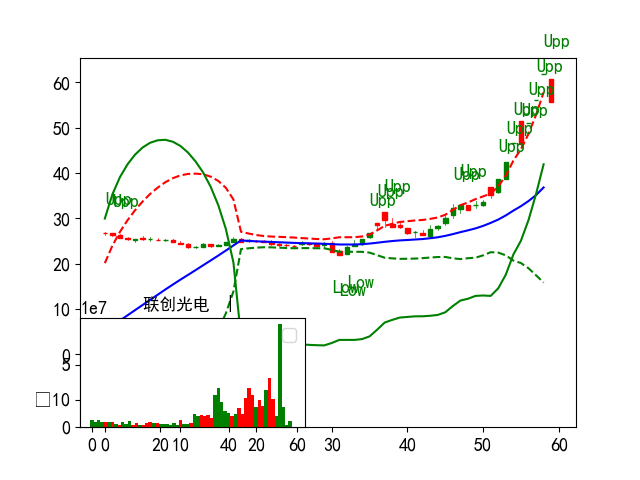

603019 0.0
xratio:0.52 ra_diff:nan
code: 603019


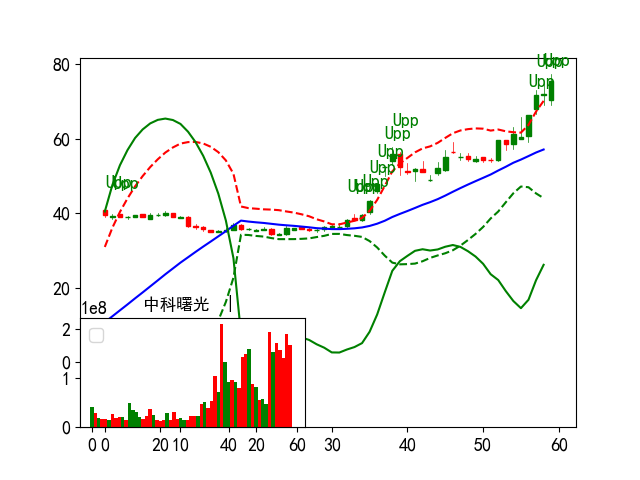

600536 0.0
xratio:0.39 ra_diff:nan
code: 600536


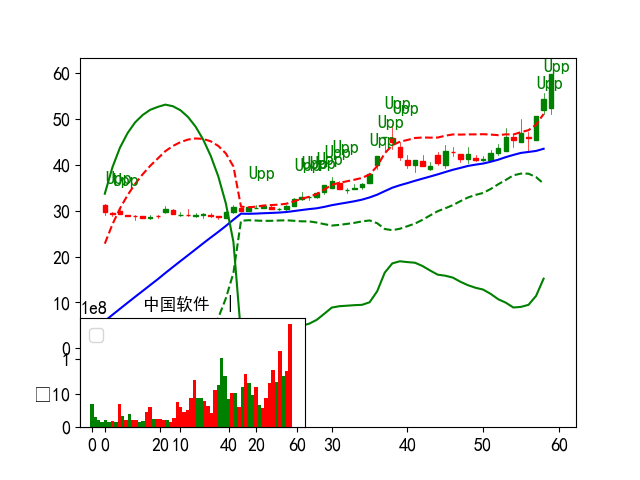

300377 0.0
xratio:0.27 ra_diff:nan
code: 300377


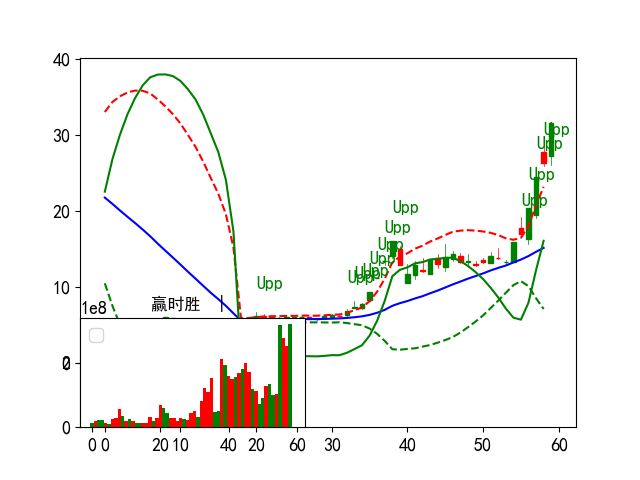

600563 0.0
xratio:0.88 ra_diff:nan
code: 600563


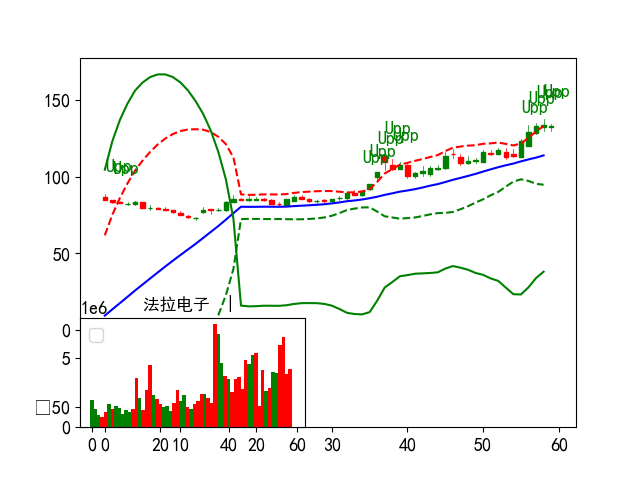

300127 0.0
xratio:0.17 ra_diff:nan
code: 300127


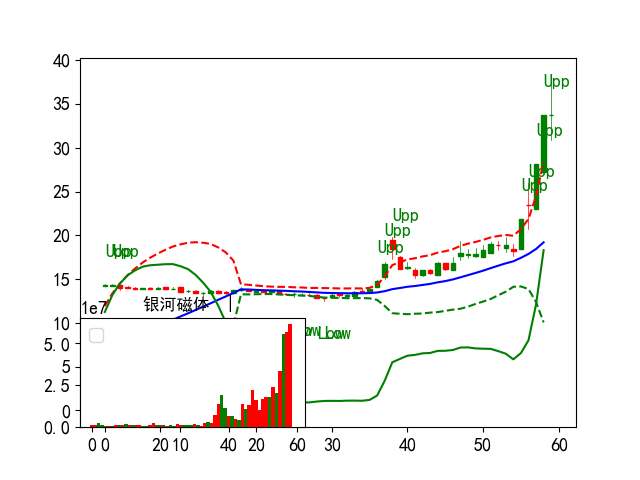

002428 0.0
xratio:0.16 ra_diff:nan
code: 002428


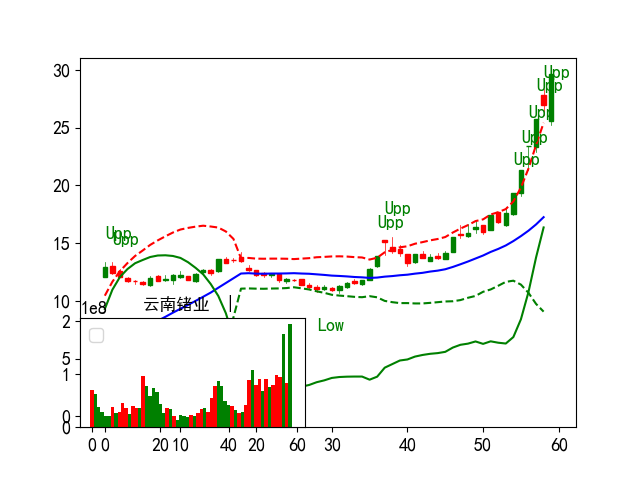

In [78]:
print("df_mask250:%s"%(len(df_mask250[df_mask250.couts > 1])))
for co in df_mask250[df_mask250.couts > 1].index[:10]:
    print(co,dfs.loc[co].ra_diff[-1])
    show_ohlc_upper(dfsRoot.loc[co][-60:],code=co)

### Tail1 Show Top 主升浪df_masklastd

In [79]:
df_mask250[(df_mask250.date >= lastday_week)][:2]
df_mask250[df_mask250.ra_diff > 1.3].shape

date    lopen    lhigh     llow    close    vol  amount  ra_diff  \
code                                                                            
300033 2024-11-07   271.00   327.61   267.09   327.61  45.14  132.91      0.0   
600519 2024-11-07  1562.46  1653.50  1562.30  1649.14   7.47  120.88      0.0   

           ma10      ma5  ...  xratio     idx  couts       nclose     open  \
code                      ...                                                
300033   229.65   259.22  ...    2.65  126.76      1   294.330567   271.00   
600519  1559.43  1575.82  ...   -3.87   90.29      1  1617.356367  1562.46   

           high      low   llastp            ticktime   perc  
code                                                          
300033   327.61   267.09   273.01 2024-11-07 15:00:00  20.00  
600519  1653.50  1562.30  1571.00 2024-11-07 15:00:00   4.97  

[2 rows x 41 columns]

(131, 41)

In [80]:
# df_masklastd = df_mask250[(df_mask250.date >= '2023-02-06') & (df_mask250.perc1d < 21) & (df_mask250.perc2d > 0) &
if resample.upper() =='D':
    df_masklastd = df_mask250[(df_mask250.date >= lastday) & (df_mask250.perc1d < 21) & (df_mask250.perc2d > 0)
                          & ((df_mask250.volsum5d > 10) & (df_mask250.close > df_mask250.ma5) )
                          ]
                          # & ((df_mask250.perc3d > 0) | ((df_mask250.close.shift(2) > df_mask250.ma5.shift(2))) )
else:
    df_masklastd = df_mask250[(df_mask250.date >= lastday_week) & (df_mask250.perc1d < 21) & (df_mask250.perc2d > 0)
                          & ((df_mask250.volsum5d > 20) & (df_mask250.close > df_mask250.ma5) )
                          ]
# (df_mask250.couts == 1) & (df_mask250.perc1d < 21)]

#当下大于上轨
df_masklastd = df_masklastd[df_masklastd.close > df_masklastd.ma5]

print("src:%s  lastd:%s " % (df_mask250.shape, df_masklastd.shape))


if resample.upper() =='M':
    df_masklastd = df_masklastd.sort_values(
        by=['perc1d', 'perc3d'],
        ascending=[0, 0])
else:
    df_masklastd = df_masklastd.sort_values(
        by=['perc3d', 'perc1d'],
        ascending=[0, 0])

# print(
#     (df_masklastd.loc
#      [:, ['name', 'couts', 'date', 'perc1d', 'perc3d', 'perc5d']][:10],
#      df_masklastd.shape,))

# show_tdx_data(df_masklastd)
print(df_masklastd.name.T[:20])
# show_tdx_data(df_masklastd[-10:])


code_t = '300675'
code_t = '605268'
code_t = '002828'
code_t = '300418'
code_t = df_masklastd.index[0]


# df_masklastd.loc[code_t, ['name', 'couts',
#                           'date', 'perc1d', 'perc3d', 'perc5d']]

# df_masklastd.loc[code_t].date


# df_mask250 = groupd250.head(1)

# df_masklastd.loc[code_t].date
# show_tdx_data(df_masklastd.loc[code_t])


# show_tdx_data(df_masklastd.loc[code_t])

src:(2849, 41)  lastd:(425, 41) 
code
300607     拓斯达
300024     机器人
300377     赢时胜
301378     通达海
300127    银河磁体
300551    古鳌科技
300539    横河精密
300499    高澜股份
300189    神农种业
300707    威唐工业
300220    金运激光
000564    供销大集
000639    西王食品
600193    创兴资源
002513    蓝丰生化
000566    海南海药
000605    渤海股份
002416     爱施德
000536    华映科技
603196    日播时尚
Name: name, dtype: object


### !!! df_mask_hmax 061

df_mask_hmax:1665
000536 0.0
xratio:0.07 ra_diff:nan
code: 000536


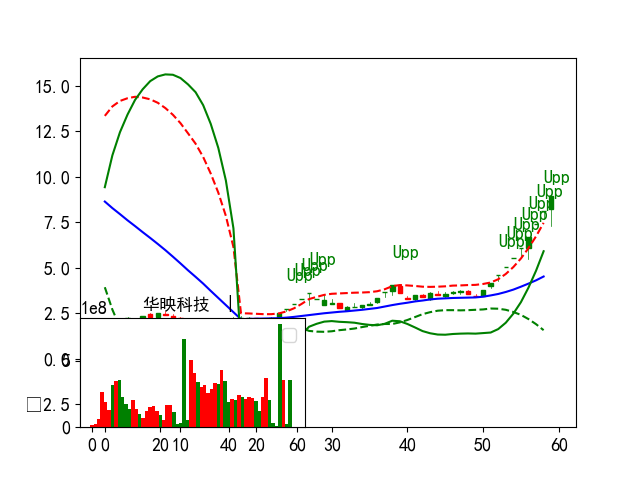

600190 0.0
xratio:0.0 ra_diff:nan
code: 600190


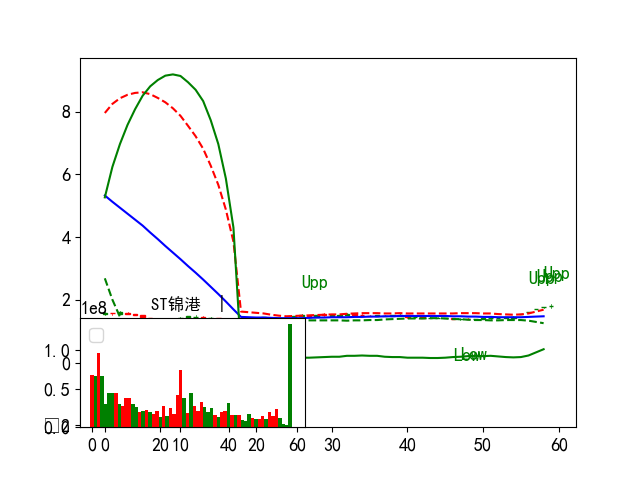

000584 0.0
xratio:0.02 ra_diff:nan
code: 000584


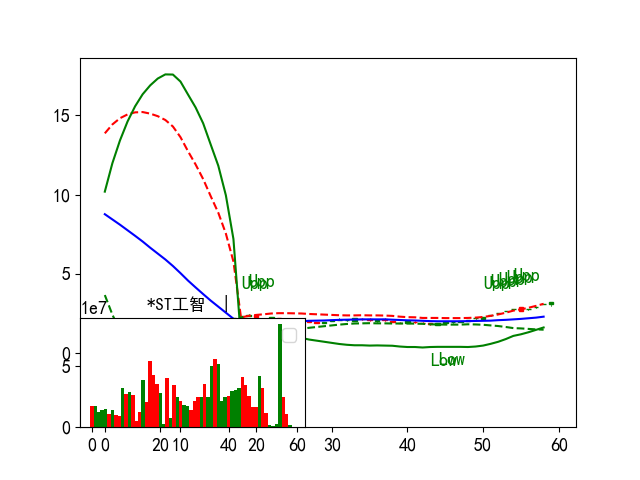

600178 0.0
xratio:0.1 ra_diff:nan
code: 600178


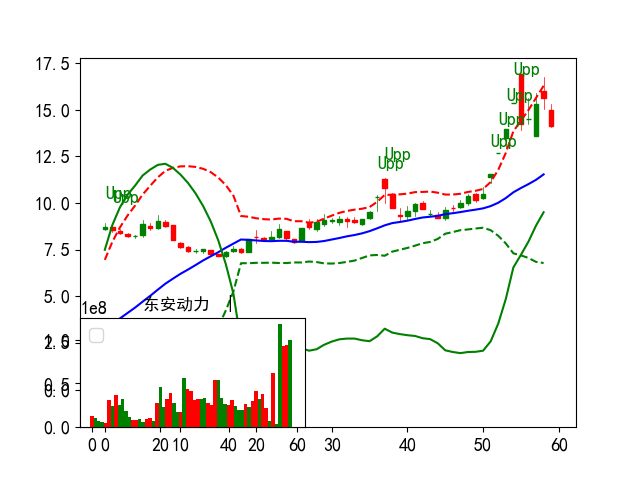

002217 0.0
xratio:0.01 ra_diff:nan
code: 002217


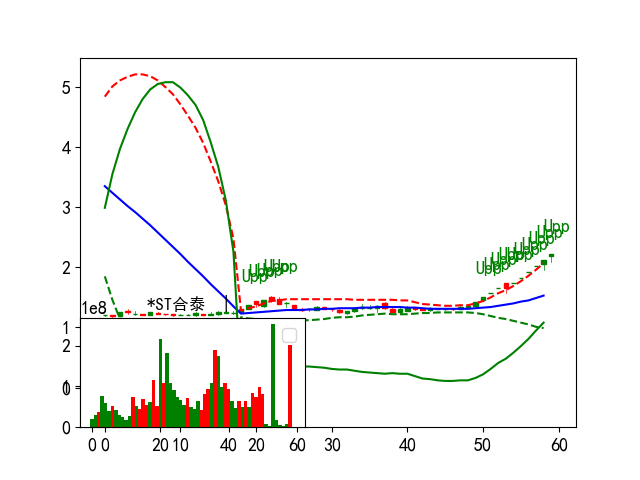

300121 0.0
xratio:0.12 ra_diff:nan
code: 300121


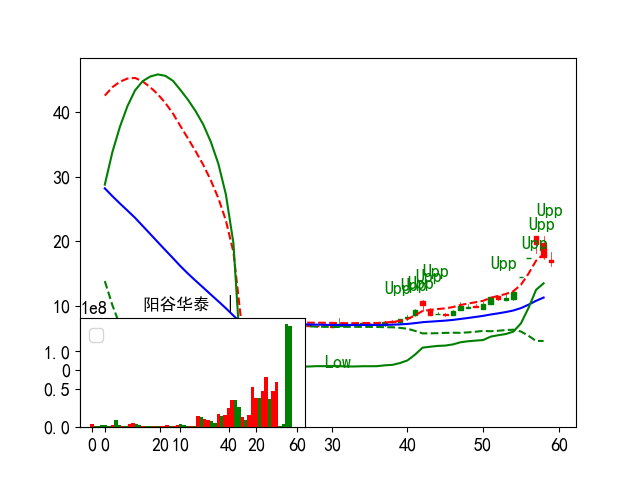

600130 0.0
xratio:0.05 ra_diff:nan
code: 600130


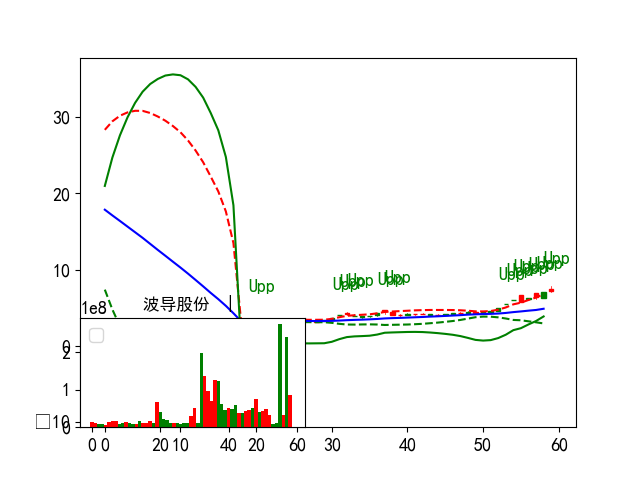

002416 0.0
xratio:0.1 ra_diff:nan
code: 002416


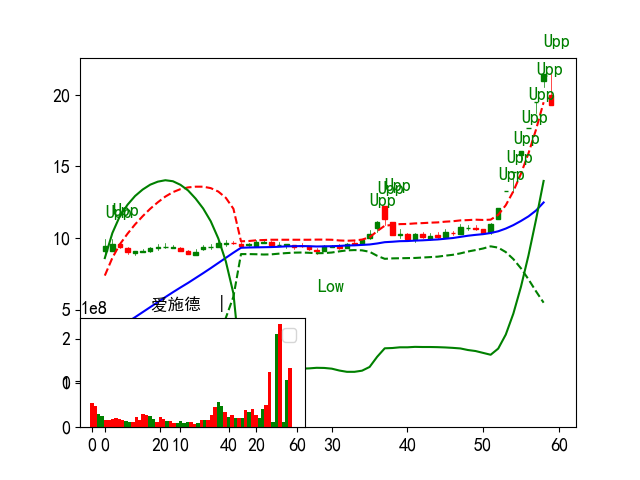

600318 0.0
xratio:0.08 ra_diff:nan
code: 600318


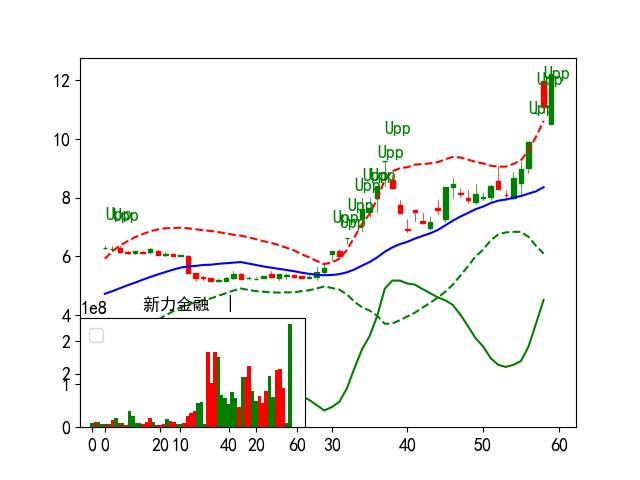

000415 0.0
xratio:0.02 ra_diff:nan
code: 000415


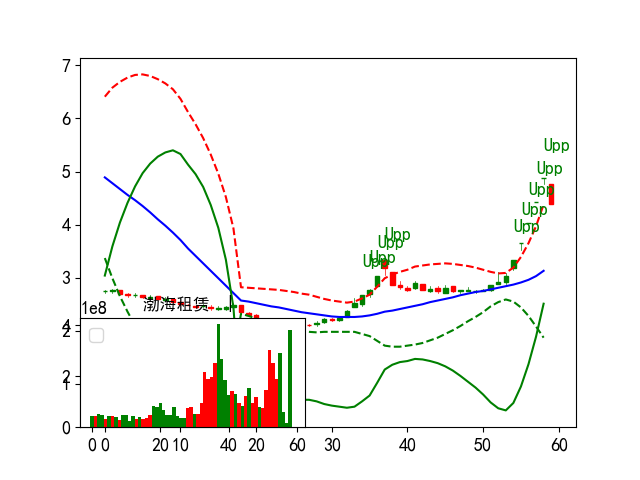

In [81]:
print("df_mask_hmax:%s"%(len(df_mask_hmax)))
for co in df_mask_hmax.index[:10]:
    print(co,dfs.loc[co].ra_diff[-1])
    show_ohlc_upper(dfsRoot.loc[co][-60:],code=co)

###  df_masklastd 068
    show_ohlc_upper(dfs.loc[co][-60:])

df_masklastd:425
300607 0.0
xratio:0.06 ra_diff:nan
code: 300607


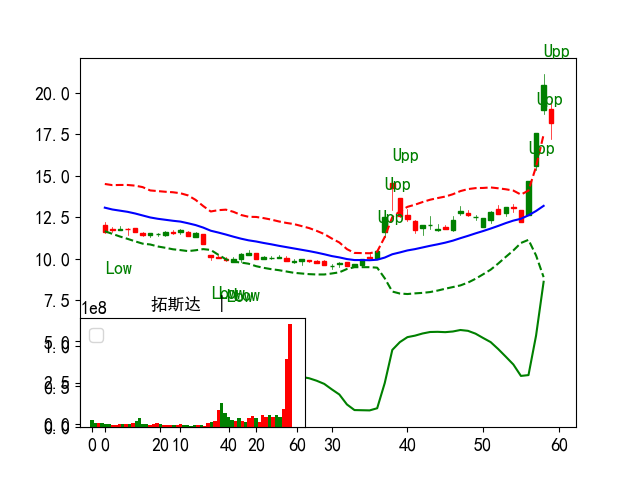

300024 0.0
xratio:0.12 ra_diff:nan
code: 300024


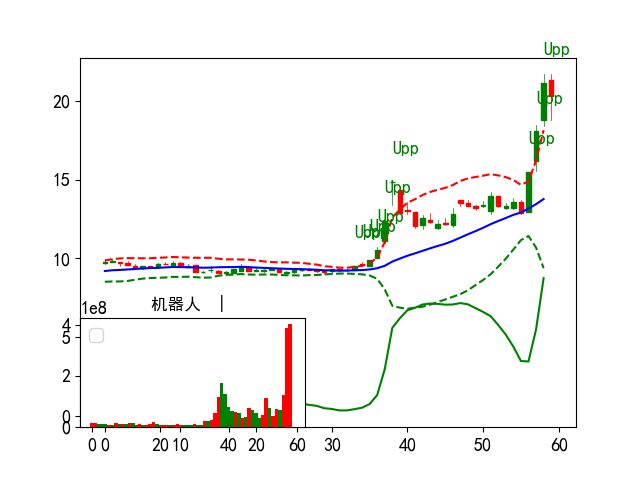

300377 0.0
xratio:0.27 ra_diff:nan
code: 300377


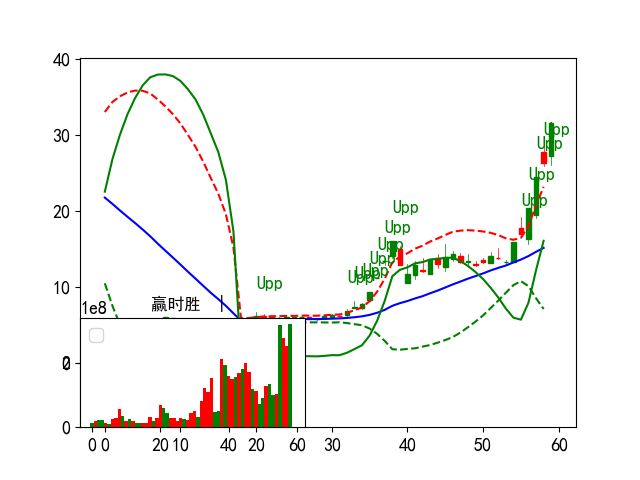

301378 0.0
xratio:0.29 ra_diff:nan
code: 301378


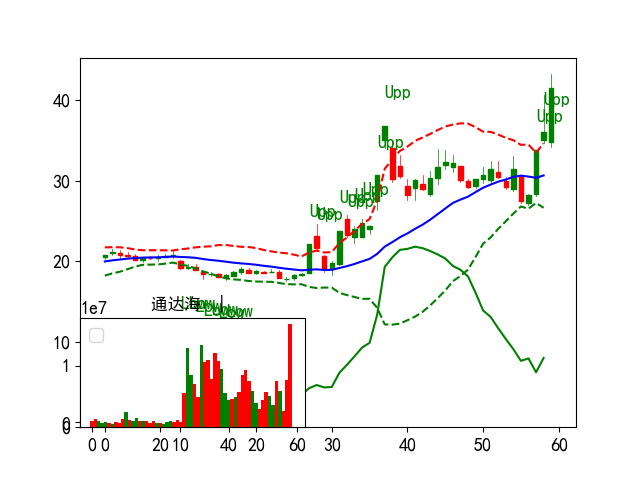

300127 0.0
xratio:0.17 ra_diff:nan
code: 300127


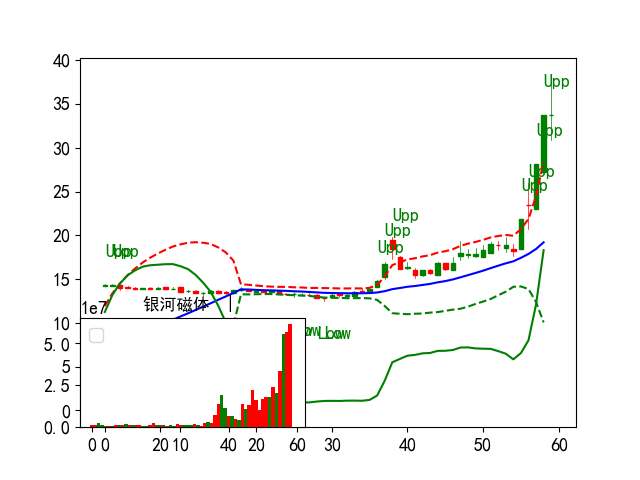

300551 0.0
xratio:0.19 ra_diff:nan
code: 300551


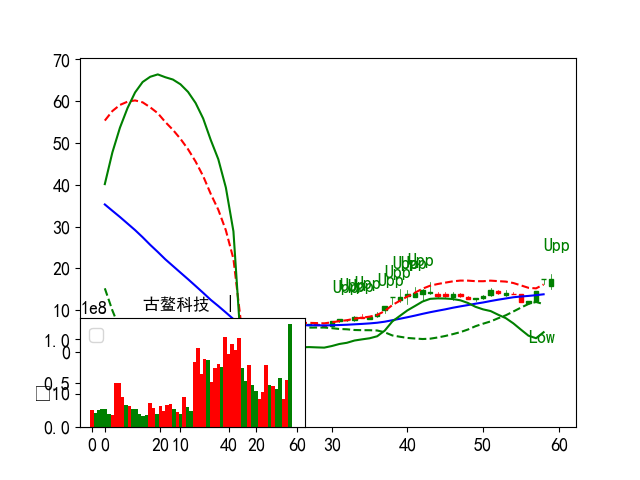

300539 0.0
xratio:0.07 ra_diff:nan
code: 300539


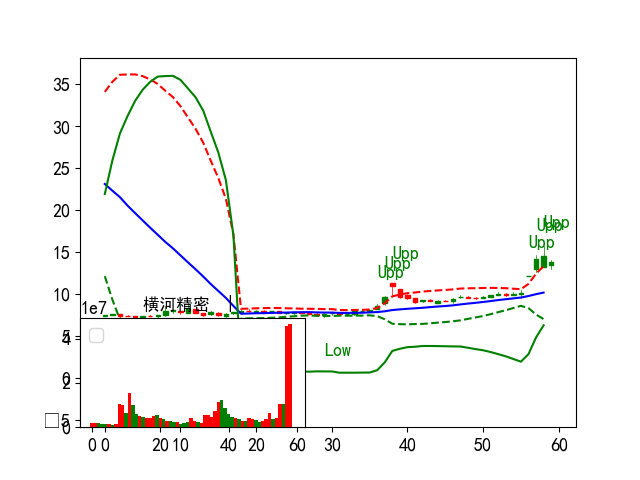

300499 0.0
xratio:0.05 ra_diff:nan
code: 300499


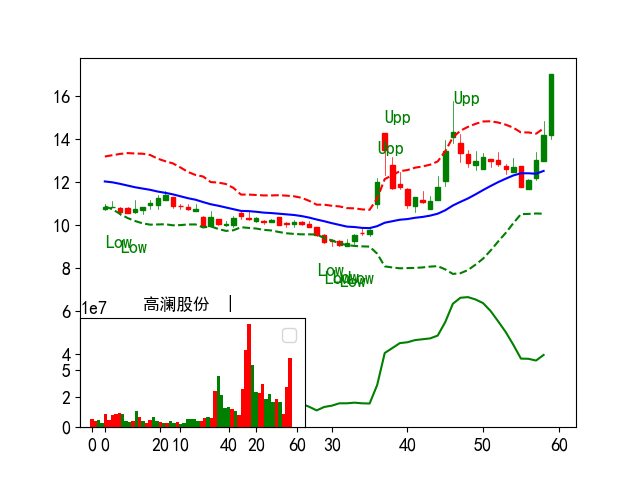

300189 0.0
xratio:0.03 ra_diff:nan
code: 300189


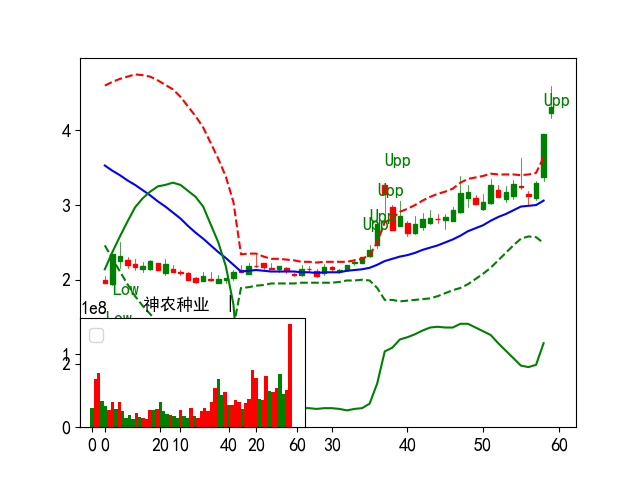

300707 0.0
xratio:0.07 ra_diff:nan
code: 300707


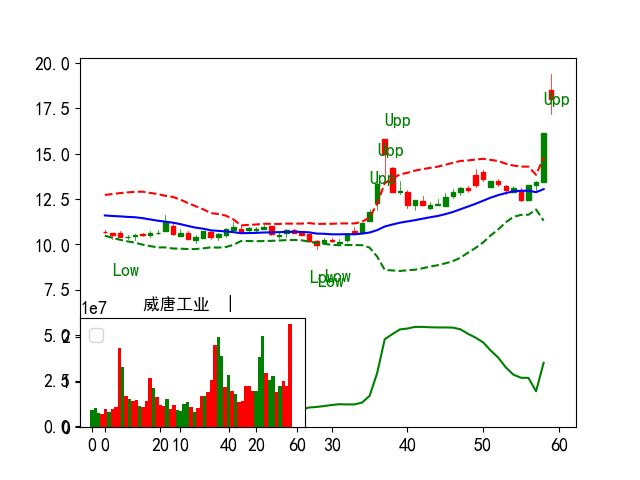

In [82]:
print("df_masklastd:%s"%(len(df_masklastd)))
for co in df_masklastd.index[:10]:
    print(co,dfs.loc[co].ra_diff[-1])
    show_ohlc_upper(dfsRoot.loc[co][-60:],code=co)

### Cross_hmax_250 068

In [83]:
# dfs.loc[code_t].ma5
cross_hmax_250 = [co for co in df_masklastd.index.get_level_values(
    'code') if co in df_mask_hmax.index.get_level_values('code')]
# df_mask250.loc[code_t]
print("cross_hamx:%s" % (len(cross_hmax_250)))
show_tdx_data(df_masklastd.loc[cross_hmax_250][:5])

cross_hamx:339
Count:5 41


name  couts       date   perc  ra_diff  xratio    idx   hat  close  \
code                                                                         
300607   拓斯达      1 2024-11-06 -11.19     2.14    0.19   7.93  8.60  18.17   
300024   机器人      1 2024-11-06  -3.84     2.33    0.22   7.90  8.75  20.30   
300377   赢时胜      3 2024-11-07  19.99     0.00    0.51  18.28  0.00  31.57   
301378   通达海      1 2024-11-07  15.28     0.00    0.11  10.77  0.00  41.49   
300127  银河磁体      4 2024-11-07   0.00     0.00    0.57  15.41  0.00  33.77   

        volsum5d  ...  ma250     nclose   llow   vol1d   vol2d   vol3d  vol4d  \
code              ...                                                           
300607     402.7  ...  14.23  17.895893  18.71   51.43  270.13   74.00 -13.00   
300024     361.3  ...   6.39  19.377861  18.37    4.29  210.70   86.59  -5.42   
300377     114.7  ...   0.00  29.314679  26.00 -100.00   27.58   -8.61 -12.80   
301378     135.8  ...   0.00  39.443135  34.13 -100.00  119.34  194.55 -55.78   
300127      41.8  ...   0.00  34.202619  30.89 -100.00    9.14    1.48  67.19   

         vol5d  perc3d  perc5d  
code                            
300607   20.15   67.43   56.30  
300024   65.17   63.90   58.84  
300377  208.53   54.75   97.81  
301378  -22.32   47.02   31.80  
300127   64.03   44.01   85.24  

[5 rows x 24 columns]

df_mask250:339
601121 0.0
xratio:0.02 ra_diff:nan
code: 601121


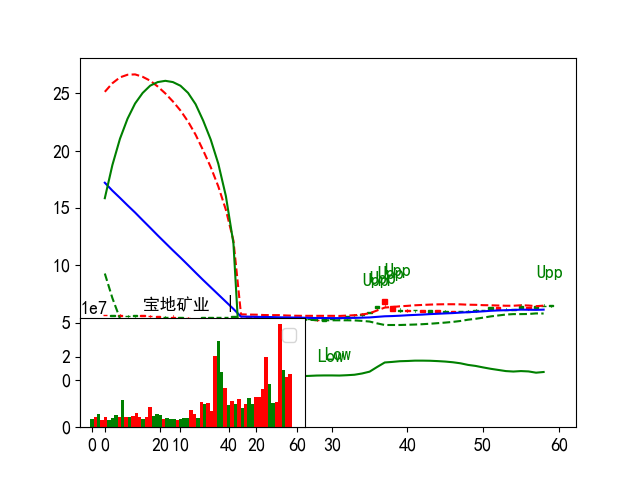

301279 0.0
xratio:0.07 ra_diff:nan
code: 301279


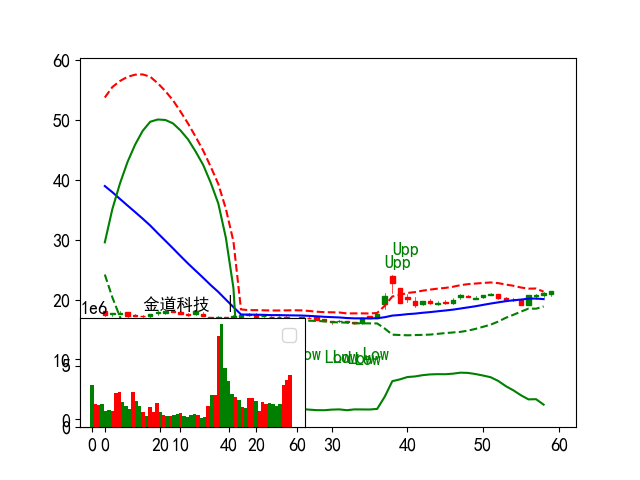

600216 0.0
xratio:0.05 ra_diff:nan
code: 600216


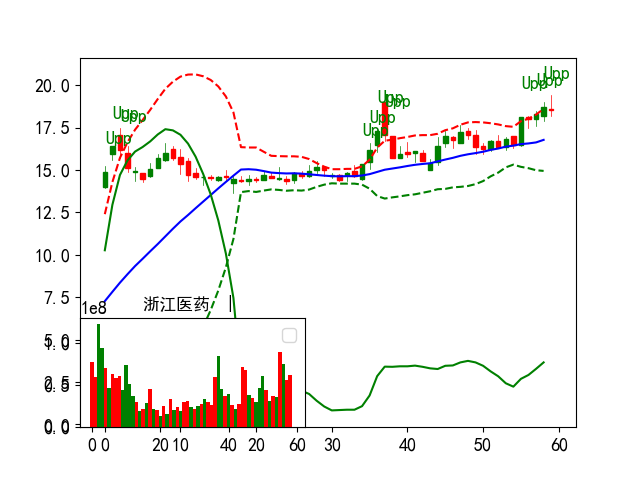

603035 0.0
xratio:0.05 ra_diff:nan
code: 603035


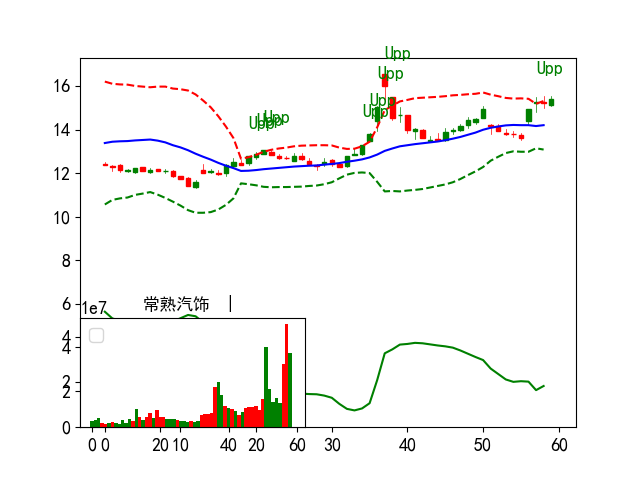

601609 0.0
xratio:0.02 ra_diff:nan
code: 601609


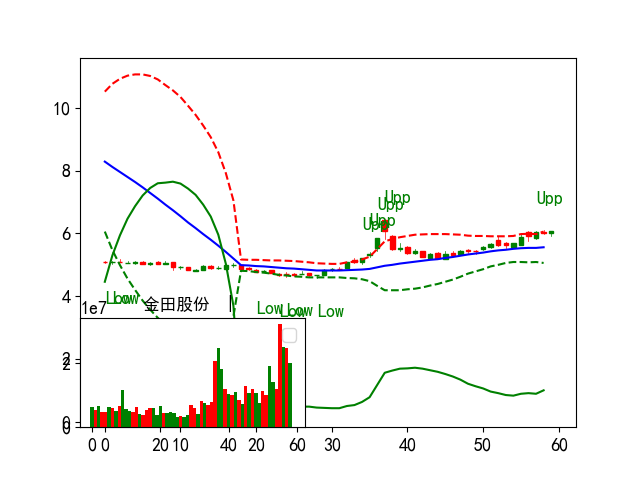

002978 0.0
xratio:0.13 ra_diff:nan
code: 002978


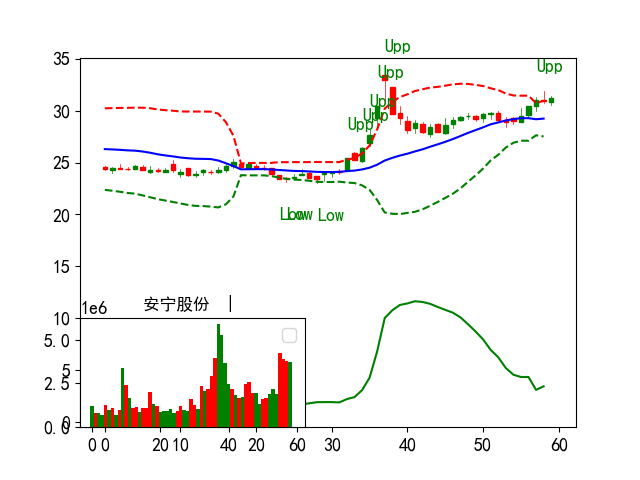

000960 0.0
xratio:0.05 ra_diff:nan
code: 000960


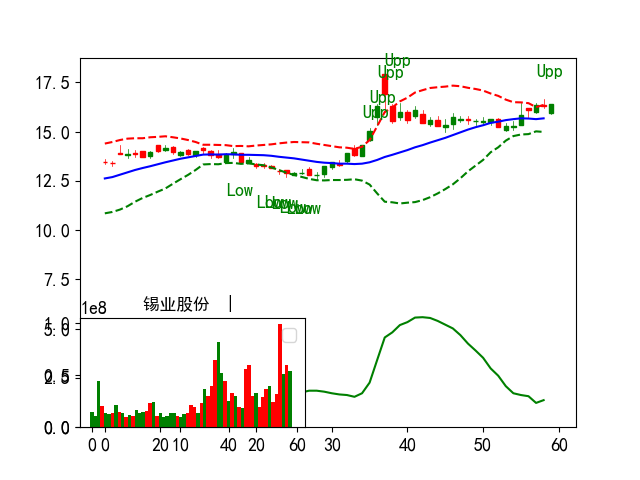

601665 0.0
xratio:0.02 ra_diff:nan
code: 601665


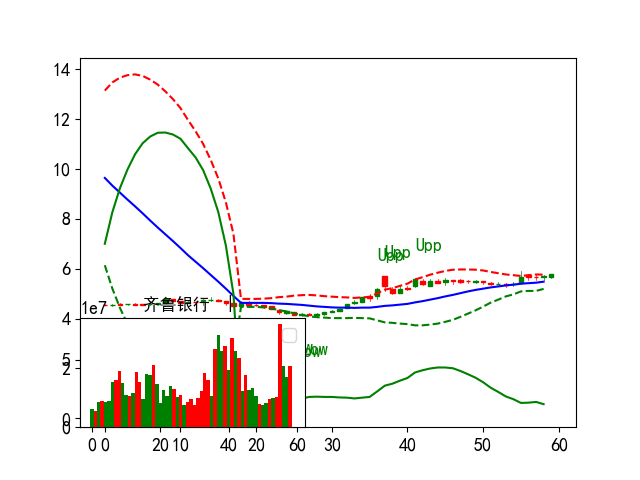

002820 0.0
xratio:0.03 ra_diff:nan
code: 002820


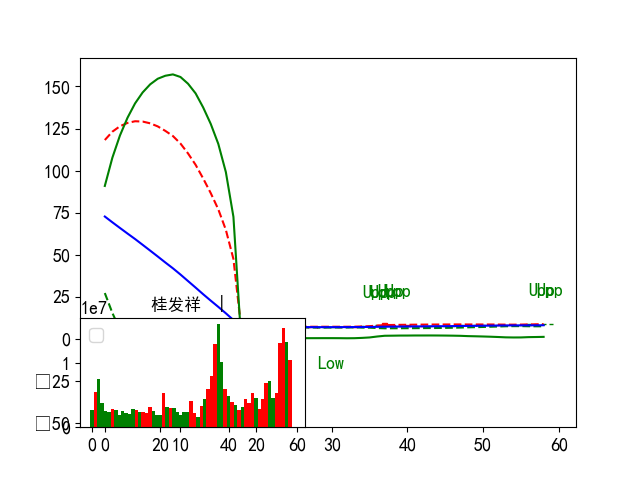

600789 0.0
xratio:0.02 ra_diff:nan
code: 600789


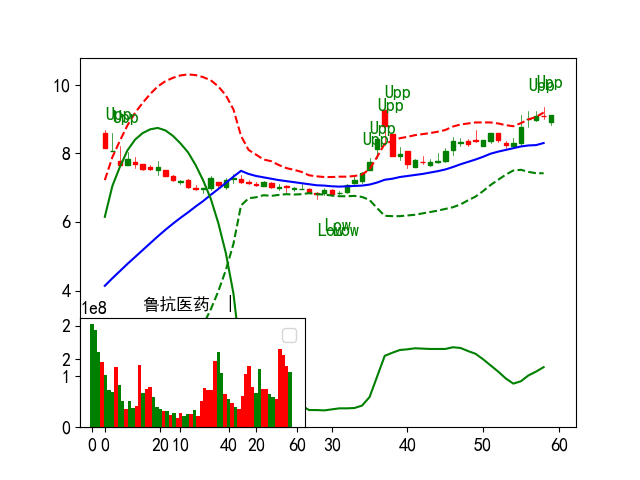

In [84]:
print("df_mask250:%s"%(len(cross_hmax_250)))
# dfs.loc['000002'].shape
for co in cross_hmax_250[-10:]:
    print(co,dfs.loc[co].ra_diff[-1])
    show_ohlc_upper(dfsRoot.loc[co][-60:],code=co)

## 写入061

In [85]:
# write_code_to_blk(df_masklastd.index.tolist(),'061')
# hmax_code = df_mask_hmax[(df_mask_hmax.couts > 1) & (df_mask_hmax.volsum5d > 10) & (df_mask_hmax.volsum5d < 150)].index.tolist()
hmax_code = df_mask_hmax[(df_mask_hmax.couts > 1) ].index.tolist()

# write_code_to_blk(cross_hmax_250,'068')
# write_code_to_blk(hmax_code,'061')

In [86]:
# print(df_masklastd.loc['301255'].date)

# 默认年线筛选

In [87]:
top_temp.shape
top_temp.index

(1162, 34)

Index(['603360', '600563', '600418', '600316', '300972', '002891', '002760',
       '002338', '002253', '600835',
       ...
       '605155', '300224', '003002', '002888', '002237', '000750', '000514',
       '301072', '000058', '600151'],
      dtype='object', name='code', length=1162)

## plt.close('all')

In [88]:
# plt.close('all')

# 写入060